In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy.stats import linregress
from plotly.offline import iplot
import colorlover as cl
import plotly.express as px
from geopy.geocoders import Nominatim
from datetime import datetime, timedelta
from ipyleaflet import basemaps, basemap_to_tiles
from ipyleaflet import Marker, LayerGroup

In [3]:
url = "https://www.vendeeglobe.org/fr/glossaire"
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
boats_list_title = np.array(soup.find_all(class_="boats-list__popup-title"),dtype=object)
print([i.text.strip() for i in boats_list_title])
boats_list_title = [i.text.strip() for i in boats_list_title]
boats_list_title

['NEWREST - ART & FENÊTRES', 'PURE - Best Western®', 'TSE -  4MYPLANET', 'Maître CoQ IV', 'CHARAL', 'LA MIE CÂLINE - ARTISANS ARTIPÔLE', 'BUREAU VALLEE 2', 'ONE PLANET ONE OCEAN', 'GROUPE SÉTIN', 'BANQUE POPULAIRE X', 'APIVIA', 'INITIATIVES-COEUR', 'MERCI', 'OMIA - WATER FAMILY', 'PRB', 'Compagnie du Lit / Jiliti', '', 'MEDALLIA', 'SEAEXPLORER - YACHT CLUB DE MONACO', 'STARK', 'MACSF', 'Yes We Cam!', 'TIME FOR OCEANS', 'CAMPAGNE DE FRANCE', 'PRYSMIAN GROUP', 'LA FABRIQUE', 'LinkedOut', 'GROUPE APICIL', 'DMG MORI Global One', 'ARKEA PAPREC', 'V and B-MAYENNE', 'HUGO BOSS', "L'OCCITANE EN PROVENCE", "CORUM L'EPARGNE"]


['NEWREST - ART & FENÊTRES',
 'PURE - Best Western®',
 'TSE -  4MYPLANET',
 'Maître CoQ IV',
 'CHARAL',
 'LA MIE CÂLINE - ARTISANS ARTIPÔLE',
 'BUREAU VALLEE 2',
 'ONE PLANET ONE OCEAN',
 'GROUPE SÉTIN',
 'BANQUE POPULAIRE X',
 'APIVIA',
 'INITIATIVES-COEUR',
 'MERCI',
 'OMIA - WATER FAMILY',
 'PRB',
 'Compagnie du Lit / Jiliti',
 '',
 'MEDALLIA',
 'SEAEXPLORER - YACHT CLUB DE MONACO',
 'STARK',
 'MACSF',
 'Yes We Cam!',
 'TIME FOR OCEANS',
 'CAMPAGNE DE FRANCE',
 'PRYSMIAN GROUP',
 'LA FABRIQUE',
 'LinkedOut',
 'GROUPE APICIL',
 'DMG MORI Global One',
 'ARKEA PAPREC',
 'V and B-MAYENNE',
 'HUGO BOSS',
 "L'OCCITANE EN PROVENCE",
 "CORUM L'EPARGNE"]

In [4]:
specs_lists = soup.find_all(class_="boats-list__popup-specs-list")
caracteristiques_boats = [i.text.strip().split("\n") for i in specs_lists]

In [5]:
dico={}
for i in range(34):
    dico.update({boats_list_title[i] : caracteristiques_boats[i]})
dico

{'NEWREST - ART & FENÊTRES': ['Numéro de voile : FRA 56',
  'Anciens noms du bateau : No Way Back, Vento di Sardegna',
  'Architecte : VPLP/Verdier',
  'Chantier : Persico Marine',
  'Date de lancement : 01 Août 2015',
  'Longueur : 18,28 m',
  'Largeur : 5,85 m',
  "Tirant d'eau : 4,50 m",
  'Déplacement (poids) : 7 t',
  'Nombre de dérives : foils',
  'Hauteur mât : 29 m',
  'Voile quille : monotype',
  'Surface de voiles au près : 320 m2',
  'Surface de voiles au portant : 570 m2'],
 'PURE - Best Western®': ['Numéro de voile : FRA 49',
  'Anciens noms du bateau : Gitana Eighty, Synerciel, Newrest-Matmut',
  'Architecte : Bruce Farr Design',
  'Chantier : Southern Ocean Marine (Nouvelle Zélande)',
  'Date de lancement : 08 Mars 2007',
  'Longueur : 18,28m',
  'Largeur : 5,80m',
  "Tirant d'eau : 4,50m",
  'Déplacement (poids) : 9t',
  'Nombre de dérives : 2',
  'Hauteur mât : 28m',
  'Voile quille : acier forgé',
  'Surface de voiles au près : 280 m2',
  'Surface de voiles au portant

In [6]:
keys =[]
values=[]
for key, value in dico.items():
    keys.append(key)
    values.append(value)

In [7]:
dico_test = {}
for i in range(34):
    dico_test[keys[i]] = {}
print(dico_test)

{'NEWREST - ART & FENÊTRES': {}, 'PURE - Best Western®': {}, 'TSE -  4MYPLANET': {}, 'Maître CoQ IV': {}, 'CHARAL': {}, 'LA MIE CÂLINE - ARTISANS ARTIPÔLE': {}, 'BUREAU VALLEE 2': {}, 'ONE PLANET ONE OCEAN': {}, 'GROUPE SÉTIN': {}, 'BANQUE POPULAIRE X': {}, 'APIVIA': {}, 'INITIATIVES-COEUR': {}, 'MERCI': {}, 'OMIA - WATER FAMILY': {}, 'PRB': {}, 'Compagnie du Lit / Jiliti': {}, '': {}, 'MEDALLIA': {}, 'SEAEXPLORER - YACHT CLUB DE MONACO': {}, 'STARK': {}, 'MACSF': {}, 'Yes We Cam!': {}, 'TIME FOR OCEANS': {}, 'CAMPAGNE DE FRANCE': {}, 'PRYSMIAN GROUP': {}, 'LA FABRIQUE': {}, 'LinkedOut': {}, 'GROUPE APICIL': {}, 'DMG MORI Global One': {}, 'ARKEA PAPREC': {}, 'V and B-MAYENNE': {}, 'HUGO BOSS': {}, "L'OCCITANE EN PROVENCE": {}, "CORUM L'EPARGNE": {}}


In [8]:
for i in range(34):
    for j in range(14):
        dico_tmp ={}
        try :
            dico_tmp.update({dico[keys[i]][j].split(":")[0]:dico[keys[i]][j].split(":")[1]})
        except:
            pass
        dico_test[keys[i]].update(dico_tmp)

dico_test

{'NEWREST - ART & FENÊTRES': {'Numéro de voile ': ' FRA 56',
  'Anciens noms du bateau ': ' No Way Back, Vento di Sardegna',
  'Architecte ': ' VPLP/Verdier',
  'Chantier ': ' Persico Marine',
  'Date de lancement ': ' 01 Août 2015',
  'Longueur ': ' 18,28 m',
  'Largeur ': ' 5,85 m',
  "Tirant d'eau ": ' 4,50 m',
  'Déplacement (poids) ': ' 7 t',
  'Nombre de dérives ': ' foils',
  'Hauteur mât ': ' 29 m',
  'Voile quille ': ' monotype',
  'Surface de voiles au près ': ' 320 m2',
  'Surface de voiles au portant ': ' 570 m2'},
 'PURE - Best Western®': {'Numéro de voile ': ' FRA 49',
  'Anciens noms du bateau ': ' Gitana Eighty, Synerciel, Newrest-Matmut',
  'Architecte ': ' Bruce Farr Design',
  'Chantier ': ' Southern Ocean Marine (Nouvelle Zélande)',
  'Date de lancement ': ' 08 Mars 2007',
  'Longueur ': ' 18,28m',
  'Largeur ': ' 5,80m',
  "Tirant d'eau ": ' 4,50m',
  'Déplacement (poids) ': ' 9t',
  'Nombre de dérives ': ' 2',
  'Hauteur mât ': ' 28m',
  'Voile quille ': ' acier f

In [9]:
df_boats = pd.DataFrame(dico_test).T
df_boats.index

Index(['NEWREST - ART & FENÊTRES', 'PURE - Best Western®', 'TSE -  4MYPLANET',
       'Maître CoQ IV', 'CHARAL', 'LA MIE CÂLINE - ARTISANS ARTIPÔLE',
       'BUREAU VALLEE 2', 'ONE PLANET ONE OCEAN', 'GROUPE SÉTIN',
       'BANQUE POPULAIRE X', 'APIVIA', 'INITIATIVES-COEUR', 'MERCI',
       'OMIA - WATER FAMILY', 'PRB', 'Compagnie du Lit / Jiliti', '',
       'MEDALLIA', 'SEAEXPLORER - YACHT CLUB DE MONACO', 'STARK', 'MACSF',
       'Yes We Cam!', 'TIME FOR OCEANS', 'CAMPAGNE DE FRANCE',
       'PRYSMIAN GROUP', 'LA FABRIQUE', 'LinkedOut', 'GROUPE APICIL',
       'DMG MORI Global One', 'ARKEA PAPREC', 'V and B-MAYENNE', 'HUGO BOSS',
       'L'OCCITANE EN PROVENCE', 'CORUM L'EPARGNE'],
      dtype='object')

In [10]:
df_boats = df_boats.reset_index()
df_boats.head()

,index,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,NEWREST - ART & FENÊTRES,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
1,PURE - Best Western®,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
2,TSE - 4MYPLANET,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeu...",Marc Lombard,MAG France,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
3,Maître CoQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
4,CHARAL,08,NaN,VPLP,CDK Technologies,18 Août 2018,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2


In [11]:
df = pd.read_csv("output.csv")
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'filename'],
      dtype='object')

In [12]:
df.drop(df.columns[[0]],axis=1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
1,NaN,Classement du vendredi 05 mars 2021 à 09h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Au premier\nTo first,NaN,Au précédent\nTo previous,NaN,Vitesse\nSpeed,Distance\nDistance,NaN,Vitesse\nSpeed,Distance\nDistance,20210305_080000
4,NaN,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29379,NaN,NaN,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29380,NaN,"Traitements et calculs : Géovoile, un service ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29382,NaN,VMG : Velocity Made Good = projection du vecte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200


In [13]:
df1 = df.drop(df.columns[[0]],axis=1)
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
1,NaN,Classement du vendredi 05 mars 2021 à 09h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Au premier\nTo first,NaN,Au précédent\nTo previous,NaN,Vitesse\nSpeed,Distance\nDistance,NaN,Vitesse\nSpeed,Distance\nDistance,20210305_080000
4,NaN,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29384 entries, 0 to 29383
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   27014 non-null  object 
 2   Unnamed: 2   24223 non-null  object 
 3   Unnamed: 3   24223 non-null  object 
 4   Unnamed: 4   16278 non-null  object 
 5   Unnamed: 5   16058 non-null  object 
 6   Unnamed: 6   16058 non-null  object 
 7   Unnamed: 7   20694 non-null  object 
 8   Unnamed: 8   20209 non-null  object 
 9   Unnamed: 9   16058 non-null  object 
 10  Unnamed: 10  16058 non-null  object 
 11  Unnamed: 11  16763 non-null  object 
 12  Unnamed: 12  16498 non-null  object 
 13  Unnamed: 13  19769 non-null  object 
 14  Unnamed: 14  16278 non-null  object 
 15  Unnamed: 15  20474 non-null  object 
 16  Unnamed: 16  20429 non-null  object 
 17  Unnamed: 17  20209 non-null  object 
 18  Unnamed: 18  20209 non-null  object 
 19  Unna

In [15]:
df2 = df1.drop_duplicates()
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
1,NaN,Classement du vendredi 05 mars 2021 à 09h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Au premier\nTo first,NaN,Au précédent\nTo previous,NaN,Vitesse\nSpeed,Distance\nDistance,NaN,Vitesse\nSpeed,Distance\nDistance,20210305_080000
4,NaN,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29378,NaN,NaN,\nFRA 53,Maxime Sorel\nV And B Mayenne,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29379,NaN,NaN,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29380,NaN,"Traitements et calculs : Géovoile, un service ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29382,NaN,VMG : Velocity Made Good = projection du vecte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200


In [16]:
df3 = df2.drop(df2.columns[[0]],axis=1)
df3

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
1,Classement du vendredi 05 mars 2021 à 09h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210305_080000
2,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Au premier\nTo first,NaN,Au précédent\nTo previous,NaN,Vitesse\nSpeed,Distance\nDistance,NaN,Vitesse\nSpeed,Distance\nDistance,20210305_080000
4,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29378,NaN,\nFRA 53,Maxime Sorel\nV And B Mayenne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29379,NaN,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29380,"Traitements et calculs : Géovoile, un service ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200
29382,VMG : Velocity Made Good = projection du vecte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_120200


In [17]:
df3.isna().sum()

Unnamed: 1      1658
Unnamed: 2      4437
Unnamed: 3      4437
Unnamed: 4     12364
Unnamed: 5     12584
Unnamed: 6     12584
Unnamed: 7      7951
Unnamed: 8      8433
Unnamed: 9     12584
Unnamed: 10    12584
Unnamed: 11    11882
Unnamed: 12    12144
Unnamed: 13     8873
Unnamed: 14    12364
Unnamed: 15     8171
Unnamed: 16     8213
Unnamed: 17     8433
Unnamed: 18     8433
Unnamed: 19     8213
Unnamed: 20     8433
filename           0
dtype: int64

In [18]:
df4 = df3.dropna(subset=["Unnamed: 1","Unnamed: 2","Unnamed: 3"])
df4

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,filename
2,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
4,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000
5,2\nARV,\nFRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,27/01/2021 20:35:47 FR,80j 06h 15min 47s\n,NaN,NaN,...,NaN,02h 31min 01s,NaN,02h 31min 01s,12.6 kts,24365.7 nm,119.6 %,15.1 kts,29135.0 nm,20210305_080000
6,3\nARV,\nFRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,28/01/2021 00:45:12 FR,80j 10h 25min 12s\n,NaN,NaN,...,NaN,06h 40min 26s,NaN,04h 09min 25s,12.6 kts,24365.7 nm,117.6 %,14.8 kts,28650.0 nm,20210305_080000
7,4\nARV,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,28/01/2021 20:19:55 FR,80j 13h 44min 55s\n-16h 15min 00s,NaN,NaN,...,NaN,10h 00min 09s,NaN,03h 19min 43s,12.5 kts,24365.7 nm,112.9 %,14.1 kts,27501.5 nm,20210305_080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,30,\nFRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,0.0 kts,0.0 kts,2788.9 nm,188°,0.2 kts,0.2 kts,4.8 nm,24295.6 nm,1.7 nm,20201108_140000
29336,31,\nFIN 222,Ari Huusela\nStark,15:30 FR\n,46°25.65'N,01°48.21'W,234°,12.1 kts,12.0 kts,0.2 nm,...,0.0 kts,0.0 kts,2789.1 nm,188°,0.2 kts,0.2 kts,4.6 nm,24295.8 nm,1.9 nm,20201108_140000
29337,NL,\nFRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_140000
29338,NL,\nFRA 14,Arnaud Boissieres\nLa Mie Câline - Artisans Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_140000


In [19]:
df5 = df4.rename(columns={"Unnamed: 1":"Rank","Unnamed: 2":"Nat./Sail",
"Unnamed: 3":"Skipper/Crew","Unnamed: 4":"Hour FR","Unnamed: 5":"Lat","Unnamed: 6":"Lon",
"Unnamed: 7":"Heading since 30 minutes","Unnamed: 8":"Speed since 30 minutes","Unnamed: 9":"VMG since 30 minutes","Unnamed: 10":"Distance since 30 minutes",
"Unnamed: 11":"Heading since last report","Unnamed: 12":"Speed since last report","Unnamed: 13":"VMG since last report","Unnamed: 14":"Distance since last report","Unnamed: 15":"Heading since 24 hours",
"Unnamed: 16":"Speed since 24 hours","Unnamed: 17":"VMG since 24 hours","Unnamed: 18":"Distance since 24 hours","Unnamed: 19":"DTF","Unnamed: 20":"DTL",
"filename":"File Name"})
df5

,Rank,Nat./Sail,Skipper/Crew,Hour FR,Lat,Lon,Heading since 30 minutes,Speed since 30 minutes,VMG since 30 minutes,Distance since 30 minutes,...,Speed since last report,VMG since last report,Distance since last report,Heading since 24 hours,Speed since 24 hours,VMG since 24 hours,Distance since 24 hours,DTF,DTL,File Name
2,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,Date d'arrivée\nArrival date,NaN,NaN,NaN,Temps de course\nRace time,NaN,NaN,...,Écarts\nGaps,NaN,NaN,NaN,Sur l'ortho\nOver ortho,NaN,►,Sur le fond\nOver ground,NaN,20210305_080000
4,1\nARV,\nFRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,NaN,NaN,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000
5,2\nARV,\nFRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,27/01/2021 20:35:47 FR,80j 06h 15min 47s\n,NaN,NaN,...,NaN,02h 31min 01s,NaN,02h 31min 01s,12.6 kts,24365.7 nm,119.6 %,15.1 kts,29135.0 nm,20210305_080000
6,3\nARV,\nFRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,28/01/2021 00:45:12 FR,80j 10h 25min 12s\n,NaN,NaN,...,NaN,06h 40min 26s,NaN,04h 09min 25s,12.6 kts,24365.7 nm,117.6 %,14.8 kts,28650.0 nm,20210305_080000
7,4\nARV,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,28/01/2021 20:19:55 FR,80j 13h 44min 55s\n-16h 15min 00s,NaN,NaN,...,NaN,10h 00min 09s,NaN,03h 19min 43s,12.5 kts,24365.7 nm,112.9 %,14.1 kts,27501.5 nm,20210305_080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,30,\nFRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,0.0 kts,0.0 kts,2788.9 nm,188°,0.2 kts,0.2 kts,4.8 nm,24295.6 nm,1.7 nm,20201108_140000
29336,31,\nFIN 222,Ari Huusela\nStark,15:30 FR\n,46°25.65'N,01°48.21'W,234°,12.1 kts,12.0 kts,0.2 nm,...,0.0 kts,0.0 kts,2789.1 nm,188°,0.2 kts,0.2 kts,4.6 nm,24295.8 nm,1.9 nm,20201108_140000
29337,NL,\nFRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_140000
29338,NL,\nFRA 14,Arnaud Boissieres\nLa Mie Câline - Artisans Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_140000


In [20]:
df5["Rank"] = df5["Rank"].apply(lambda x : x.split("\n")[0])
df5["Nat./Sail"] = df5["Nat./Sail"].apply(lambda x : x.split("\n")[1])

In [21]:
df5["Skipper"] = df5["Skipper/Crew"].apply(lambda x : x.split("\n")[0])
df5["Crew"] = df5["Skipper/Crew"].apply(lambda x : x.split("\n")[1])

In [22]:
df5["Rank"].value_counts()

RET     3958
Rang     922
14       702
25       702
24       702
23       702
22       702
21       702
20       702
19       702
1        702
17       702
16       702
15       702
18       702
13       702
6        702
2        702
12       702
4        702
5        702
3        702
7        702
8        702
9        702
10       702
11       702
26       417
27       376
28       200
29       163
30       158
31       156
32       136
33        47
NL         5
Name: Rank, dtype: int64

In [23]:
list = ["Skipper / crew"]
df5["Crew"] = df5["Crew"][~df5["Crew"].isin(list)]

In [24]:
df5["Crew"].value_counts()

Maître Coq IV                             702
APIVIA                                    702
CORUM L'Épargne                           702
PRB                                       702
ARKEA PAPREC                              702
Initiatives - Coeur                       702
Newrest - Art et Fenetres                 702
MACSF                                     702
Merci                                     702
Stark                                     702
TSE - 4myplanet                           702
Groupe Sétin                              702
Campagne de France                        702
Compagnie du lit - Jiliti                 702
One Planet One Ocean                      702
Medallia                                  702
Time For Oceans                           702
La Fabrique                               702
DMG MORI Global One                       702
Bureau Vallée 2                           702
Yes we Cam !                              702
Seaexplorer - Yacht Club De Monaco

In [25]:
# df5["Crew"].map({"Hugo Boss":"HUGO BOSS"})

In [26]:
df5["Crew"].replace("Hugo Boss","HUGO BOSS",inplace=True)
df5["Crew"] = df5["Crew"].str.upper()

In [27]:
# df_boats["index"].replace("NEWREST - ART & FENÊTRES","Newrest - Art et Fenetres")
# df_boats["index"].replace("TSE -  4MYPLANET","TSE - 4myplanet")
# df_boats["index"].replace("Maître CoQ IV","Maître Coq IV")
# df_boats["index"].replace("CHARAL","Charal")
# df_boats["index"].replace("LA MIE CÂLINE - ARTISANS ARTIPÔLE","La Mie Câline - Artisans Artipôle")
# df_boats["index"].replace("BUREAU VALLEE 2","Bureau Vallée 2")
# df_boats["index"].replace("ONE PLANET ONE OCEAN","Bureau Vallée 2")


In [28]:
df_boats["index"] = df_boats["index"].str.upper()

In [29]:
df5["Crew"].value_counts()

MAÎTRE COQ IV                             702
TIME FOR OCEANS                           702
PRB                                       702
HUGO BOSS                                 702
ARKEA PAPREC                              702
INITIATIVES - COEUR                       702
NEWREST - ART ET FENETRES                 702
MACSF                                     702
MERCI                                     702
STARK                                     702
TSE - 4MYPLANET                           702
GROUPE SÉTIN                              702
CAMPAGNE DE FRANCE                        702
COMPAGNIE DU LIT - JILITI                 702
ONE PLANET ONE OCEAN                      702
MEDALLIA                                  702
LA FABRIQUE                               702
APIVIA                                    702
DMG MORI GLOBAL ONE                       702
LA MIE CÂLINE - ARTISANS ARTIPÔLE         702
PURE - BEST WESTERN HOTELS AND RESORTS    702
CHARAL                            

In [30]:
df_boats["index"].values

array(['NEWREST - ART & FENÊTRES', 'PURE - BEST WESTERN®',
       'TSE -  4MYPLANET', 'MAÎTRE COQ IV', 'CHARAL',
       'LA MIE CÂLINE - ARTISANS ARTIPÔLE', 'BUREAU VALLEE 2',
       'ONE PLANET ONE OCEAN', 'GROUPE SÉTIN', 'BANQUE POPULAIRE X',
       'APIVIA', 'INITIATIVES-COEUR', 'MERCI', 'OMIA - WATER FAMILY',
       'PRB', 'COMPAGNIE DU LIT / JILITI', '', 'MEDALLIA',
       'SEAEXPLORER - YACHT CLUB DE MONACO', 'STARK', 'MACSF',
       'YES WE CAM!', 'TIME FOR OCEANS', 'CAMPAGNE DE FRANCE',
       'PRYSMIAN GROUP', 'LA FABRIQUE', 'LINKEDOUT', 'GROUPE APICIL',
       'DMG MORI GLOBAL ONE', 'ARKEA PAPREC', 'V AND B-MAYENNE',
       'HUGO BOSS', "L'OCCITANE EN PROVENCE", "CORUM L'EPARGNE"],
      dtype=object)

In [31]:
df_boats["index"].replace("YES WE CAM!","YES WE CAM !",inplace=True)
df_boats["index"].replace("NEWREST - ART & FENÊTRES","NEWREST - ART ET FENETRES",inplace=True)
df_boats["index"].replace("PURE - BEST WESTERN®","PURE - BEST WESTERN HOTELS AND RESORTS",inplace=True)
df_boats["index"].replace("TSE -  4MYPLANET","TSE - 4MYPLANET",inplace=True)
df_boats["index"].replace("BUREAU VALLEE 2","BUREAU VALLÉE 2",inplace=True)
df_boats["index"].replace("INITIATIVES-COEUR","INITIATIVES - COEUR",inplace=True)
df_boats["index"].replace("COMPAGNIE DU LIT / JILITI","COMPAGNIE DU LIT - JILITI",inplace=True)
df_boats["index"].replace("YV AND B-MAYENNE","V AND B MAYENNE",inplace=True)
df_boats["index"].replace("CORUM L'EPARGNE","CORUM L'ÉPARGNE",inplace=True)

In [32]:
df_boats.dropna(subset=["Numéro de voile "],inplace=True)
df_boats

,index,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,NEWREST - ART ET FENETRES,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
1,PURE - BEST WESTERN HOTELS AND RESORTS,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
2,TSE - 4MYPLANET,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeu...",Marc Lombard,MAG France,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
3,MAÎTRE COQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
4,CHARAL,08,NaN,VPLP,CDK Technologies,18 Août 2018,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2
5,LA MIE CÂLINE - ARTISANS ARTIPÔLE,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,"18,28 m","5,65 m","4,50 m","7,9 tonnes",foils,29 m,basculante avec vérin,300 m²,610 m²
6,BUREAU VALLÉE 2,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,09 Juin 2015,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
7,ONE PLANET ONE OCEAN,ESP 33,Kingfisher - Educacion sin Fronteras - Forum ...,Owen Clarke Design,Martens Yachts,02 Février 2000,"18,28 m","5,30 m","4,50 m","8,9 t",2,26 m,acier,240 m2,470 m2
8,GROUPE SÉTIN,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, ...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,"18,28 m","5,80 m","4,50 m",9 t,2 asymétriques,"28,50",basculante sur vérin hydraulique,270 m2,560 m2
9,BANQUE POPULAIRE X,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,01 Mars 2011,"18,28 m","5,70 m","4,5 m","7,7 t",2,29 m,acier forgé,340 m2,570 m2


In [33]:
df5.dropna(subset=["Crew"],inplace=True)
df5

,Rank,Nat./Sail,Skipper/Crew,Hour FR,Lat,Lon,Heading since 30 minutes,Speed since 30 minutes,VMG since 30 minutes,Distance since 30 minutes,...,Distance since last report,Heading since 24 hours,Speed since 24 hours,VMG since 24 hours,Distance since 24 hours,DTF,DTL,File Name,Skipper,Crew
4,1,FRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,NaN,NaN,12.6 kts,24365.7 nm,117.3 %,14.8 kts,28583.8 nm,20210305_080000,Yannick Bestaven,MAÎTRE COQ IV
5,2,FRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,27/01/2021 20:35:47 FR,80j 06h 15min 47s\n,NaN,NaN,...,NaN,02h 31min 01s,12.6 kts,24365.7 nm,119.6 %,15.1 kts,29135.0 nm,20210305_080000,Charlie Dalin,APIVIA
6,3,FRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,28/01/2021 00:45:12 FR,80j 10h 25min 12s\n,NaN,NaN,...,NaN,04h 09min 25s,12.6 kts,24365.7 nm,117.6 %,14.8 kts,28650.0 nm,20210305_080000,Louis Burton,BUREAU VALLÉE 2
7,4,FRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,28/01/2021 20:19:55 FR,80j 13h 44min 55s\n-16h 15min 00s,NaN,NaN,...,NaN,03h 19min 43s,12.5 kts,24365.7 nm,112.9 %,14.1 kts,27501.5 nm,20210305_080000,Jean Le Cam,YES WE CAM !
8,5,MON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,NaN,NaN,NaN,28/01/2021 11:19:45 FR,80j 14h 59min 45s\n-06h 00min 00s,NaN,NaN,...,NaN,01h 14min 50s,12.6 kts,24365.7 nm,116.8 %,14.7 kts,28448.5 nm,20210305_080000,Boris Herrmann,SEAEXPLORER - YACHT CLUB DE MONACO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29334,29,FRA 4,Sébastien Simon\nARKEA PAPREC,15:29 FR\n-1min,46°25.75'N,01°48.73'W,235°,13.4 kts,13.4 kts,0.7 nm,...,2789.3 nm,192°,0.2 kts,0.1 kts,4.5 nm,24295.5 nm,1.6 nm,20201108_140000,Sébastien Simon,ARKEA PAPREC
29335,30,FRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,2788.9 nm,188°,0.2 kts,0.2 kts,4.8 nm,24295.6 nm,1.7 nm,20201108_140000,Miranda Merron,CAMPAGNE DE FRANCE
29336,31,FIN 222,Ari Huusela\nStark,15:30 FR\n,46°25.65'N,01°48.21'W,234°,12.1 kts,12.0 kts,0.2 nm,...,2789.1 nm,188°,0.2 kts,0.2 kts,4.6 nm,24295.8 nm,1.9 nm,20201108_140000,Ari Huusela,STARK
29337,NL,FRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108_140000,Charlie Dalin,APIVIA


In [34]:
df_combine = df5.join(df_boats.set_index("index"),on="Crew" , lsuffix="_classement",rsuffix="_boat")
df_combine

,Rank,Nat./Sail,Skipper/Crew,Hour FR,Lat,Lon,Heading since 30 minutes,Speed since 30 minutes,VMG since 30 minutes,Distance since 30 minutes,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
4,1,FRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
5,2,FRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,27/01/2021 20:35:47 FR,80j 06h 15min 47s\n,NaN,NaN,...,05 Août 2019,"18,28 m","5,85 m","4,50 m",8 t,foils,29 m,acier,350 m2,560 m2
6,3,FRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,28/01/2021 00:45:12 FR,80j 10h 25min 12s\n,NaN,NaN,...,09 Juin 2015,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
7,4,FRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,28/01/2021 20:19:55 FR,80j 13h 44min 55s\n-16h 15min 00s,NaN,NaN,...,03 Janvier 2007,"18,28 m","5,90 m","4,50 m",8 t,2,28 m,acier forgé,300 m2,620 m2
8,5,MON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,NaN,NaN,NaN,28/01/2021 11:19:45 FR,80j 14h 59min 45s\n-06h 00min 00s,NaN,NaN,...,07 Août 2015,"18,28 m","5,70 m","4,50 m","7,6 t",foils,29 m,acier,290 m2,490 m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29334,29,FRA 4,Sébastien Simon\nARKEA PAPREC,15:29 FR\n-1min,46°25.75'N,01°48.73'W,235°,13.4 kts,13.4 kts,0.7 nm,...,19 Juillet 2019,"18,28 m","5,70 m","4,50 m",8 t,foiler,29 m,Inox usiné,260 m2,600 m2
29335,30,FRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,04 Mai 2006,"18,28 m","5,50 m","4,50 m","8,5 t",2,28 m,carbone,330 m2,600 m2
29336,31,FIN 222,Ari Huusela\nStark,15:30 FR\n,46°25.65'N,01°48.21'W,234°,12.1 kts,12.0 kts,0.2 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
29337,NL,FRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,05 Août 2019,"18,28 m","5,85 m","4,50 m",8 t,foils,29 m,acier,350 m2,560 m2


In [35]:
df_combine["Rank"].value_counts()

RET    3958
1       702
15      702
25      702
24      702
23      702
22      702
21      702
20      702
19      702
2       702
17      702
16      702
18      702
14      702
7       702
3       702
13      702
5       702
6       702
4       702
8       702
9       702
10      702
11      702
12      702
26      417
27      376
28      200
29      163
30      158
31      156
32      136
33       47
NL        5
Name: Rank, dtype: int64

In [36]:
try :
    list = ["RET","NL",33]
except:
    list = ["RET","NL","33"]

df_combine["Rank"] = df_combine["Rank"][~df_combine["Rank"].isin(list)]
df_combine.dropna(subset=["Rank"],inplace=True)
df_combine

,Rank,Nat./Sail,Skipper/Crew,Hour FR,Lat,Lon,Heading since 30 minutes,Speed since 30 minutes,VMG since 30 minutes,Distance since 30 minutes,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
4,1,FRA 17,Yannick Bestaven\nMaître Coq IV,NaN,NaN,NaN,28/01/2021 04:19:46 FR,80j 03h 44min 46s\n-10h 15min 00s,NaN,NaN,...,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
5,2,FRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,27/01/2021 20:35:47 FR,80j 06h 15min 47s\n,NaN,NaN,...,05 Août 2019,"18,28 m","5,85 m","4,50 m",8 t,foils,29 m,acier,350 m2,560 m2
6,3,FRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,28/01/2021 00:45:12 FR,80j 10h 25min 12s\n,NaN,NaN,...,09 Juin 2015,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
7,4,FRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,28/01/2021 20:19:55 FR,80j 13h 44min 55s\n-16h 15min 00s,NaN,NaN,...,03 Janvier 2007,"18,28 m","5,90 m","4,50 m",8 t,2,28 m,acier forgé,300 m2,620 m2
8,5,MON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,NaN,NaN,NaN,28/01/2021 11:19:45 FR,80j 14h 59min 45s\n-06h 00min 00s,NaN,NaN,...,07 Août 2015,"18,28 m","5,70 m","4,50 m","7,6 t",foils,29 m,acier,290 m2,490 m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29332,27,FRA 72,Alexia Barrier\nTSE - 4myplanet,15:30 FR\n,46°25.83'N,01°48.92'W,236°,10.9 kts,10.8 kts,0.2 nm,...,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
29333,28,FRA 27,Isabelle Joschke\nMACSF,15:26 FR\n-4min,46°24.98'N,01°48.22'W,238°,13.8 kts,13.5 kts,0.2 nm,...,04 Juillet 2007,"18,28 m","5,60 m","4,50 m","7,7 t",foils,27 m,acier,300 m2,650 m2
29334,29,FRA 4,Sébastien Simon\nARKEA PAPREC,15:29 FR\n-1min,46°25.75'N,01°48.73'W,235°,13.4 kts,13.4 kts,0.7 nm,...,19 Juillet 2019,"18,28 m","5,70 m","4,50 m",8 t,foiler,29 m,Inox usiné,260 m2,600 m2
29335,30,FRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,04 Mai 2006,"18,28 m","5,50 m","4,50 m","8,5 t",2,28 m,carbone,330 m2,600 m2


In [37]:
df_combine.dropna(subset=["Hour FR"],inplace=True)
df_combine

,Rank,Nat./Sail,Skipper/Crew,Hour FR,Lat,Lon,Heading since 30 minutes,Speed since 30 minutes,VMG since 30 minutes,Distance since 30 minutes,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
71,25,FIN 222,Ari Huusela\nStark,04:30 FR\n,46°42.81'N,02°25.92'W,128°,11.4 kts,11.3 kts,1.0 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
114,25,FIN 222,Ari Huusela\nStark,21:30 FR\n,47°08.44'N,03°48.90'W,107°,8.7 kts,8.6 kts,4.4 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
157,25,FIN 222,Ari Huusela\nStark,17:30 FR\n,47°10.93'N,04°42.36'W,94°,10.0 kts,9.7 kts,5.0 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
200,25,FIN 222,Ari Huusela\nStark,14:30 FR\n,47°12.82'N,05°20.69'W,106°,6.7 kts,6.7 kts,3.4 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
243,25,FIN 222,Ari Huusela\nStark,11:30 FR\n,47°09.11'N,05°35.11'W,19°,5.7 kts,0.5 kts,2.8 nm,...,06 Août 2007,"18,28 m","5,80 m","4,50 m","8,5 t",2,28 m,acier,270 m2,580 m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29332,27,FRA 72,Alexia Barrier\nTSE - 4myplanet,15:30 FR\n,46°25.83'N,01°48.92'W,236°,10.9 kts,10.8 kts,0.2 nm,...,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
29333,28,FRA 27,Isabelle Joschke\nMACSF,15:26 FR\n-4min,46°24.98'N,01°48.22'W,238°,13.8 kts,13.5 kts,0.2 nm,...,04 Juillet 2007,"18,28 m","5,60 m","4,50 m","7,7 t",foils,27 m,acier,300 m2,650 m2
29334,29,FRA 4,Sébastien Simon\nARKEA PAPREC,15:29 FR\n-1min,46°25.75'N,01°48.73'W,235°,13.4 kts,13.4 kts,0.7 nm,...,19 Juillet 2019,"18,28 m","5,70 m","4,50 m",8 t,foiler,29 m,Inox usiné,260 m2,600 m2
29335,30,FRA 50,Miranda Merron\nCampagne de France,15:28 FR\n-2min,46°25.39'N,01°48.34'W,237°,11.4 kts,11.3 kts,0.4 nm,...,04 Mai 2006,"18,28 m","5,50 m","4,50 m","8,5 t",2,28 m,carbone,330 m2,600 m2


In [38]:
try :
    df_combine = df_combine.drop(columns=["Skipper/Crew","level_0"])
except:
    pass

In [39]:
df_combine.columns

Index(['Rank', 'Nat./Sail', 'Skipper/Crew', 'Hour FR', 'Lat', 'Lon',
       'Heading since 30 minutes', 'Speed since 30 minutes',
       'VMG since 30 minutes', 'Distance since 30 minutes',
       'Heading since last report', 'Speed since last report',
       'VMG since last report', 'Distance since last report',
       'Heading since 24 hours', 'Speed since 24 hours', 'VMG since 24 hours',
       'Distance since 24 hours', 'DTF', 'DTL', 'File Name', 'Skipper', 'Crew',
       'Numéro de voile ', 'Anciens noms du bateau ', 'Architecte ',
       'Chantier ', 'Date de lancement ', 'Longueur ', 'Largeur ',
       'Tirant d'eau ', 'Déplacement (poids) ', 'Nombre de dérives ',
       'Hauteur mât ', 'Voile quille ', 'Surface de voiles au près ',
       'Surface de voiles au portant '],
      dtype='object')

In [40]:
try :
    df_combine = df_combine.drop(columns=["level_0"])
except:
    pass

In [41]:
try :
    df_combine["VMG since 30 minutes"] = df_combine["VMG since 30 minutes"].apply(lambda x : x.split()[0])
    df_combine["VMG since last report"] = df_combine["VMG since last report"].apply(lambda x : x.split()[0])
    df_combine["VMG since 24 hours"] = df_combine["VMG since 24 hours"].apply(lambda x : x.split()[0])
except:
    pass

In [42]:
df_combine["VMG since 30 minutes"] = pd.to_numeric(df_combine["VMG since 30 minutes"])
df_combine["VMG since last report"] = pd.to_numeric(df_combine["VMG since last report"])
df_combine["VMG since 24 hours"] = pd.to_numeric(df_combine["VMG since 24 hours"])
df_combine["Rank"] = pd.to_numeric(df_combine["Rank"])

In [43]:
df_combine[["Rank","VMG since 30 minutes","VMG since last report","VMG since 24 hours"]].value_counts()

Rank  VMG since 30 minutes  VMG since last report  VMG since 24 hours
33    0.0                   0.0                    0.0                   14
32    0.0                   0.0                    0.0                    6
29    8.1                   8.1                    8.5                    2
16    15.7                  15.4                   14.0                   2
12    10.0                  10.2                   10.3                   2
                                                                         ..
11    12.3                  12.4                   14.0                   1
                            12.9                   16.2                   1
                            13.4                   13.7                   1
      12.4                  11.6                   13.1                   1
33    16.6                  13.3                   4.2                    1
Length: 15246, dtype: int64

In [44]:
df_Rank_VMG = df_combine[["Rank","VMG since 30 minutes","VMG since last report","VMG since 24 hours"]].groupby(["Rank"]).mean().sort_values(by='Rank')
df_combine[["Rank","VMG since 30 minutes","VMG since last report","VMG since 24 hours"]].groupby(["Rank"]).mean().sort_values(by='Rank')


,VMG since 30 minutes,VMG since last report,VMG since 24 hours
Rank,,,
1,12.806224,12.851660,12.755809
2,12.681573,12.792547,12.763354
3,12.693168,12.801242,12.783023
4,12.629752,12.708884,12.478306
5,12.661443,12.785773,12.690515
6,12.705967,12.753292,12.585597
7,12.848971,12.761111,12.425720
8,12.564549,12.629098,12.334836
9,12.519348,12.456415,12.471690


<AxesSubplot:title={'center':'Ranking vs VMG'}, xlabel='Rank'>

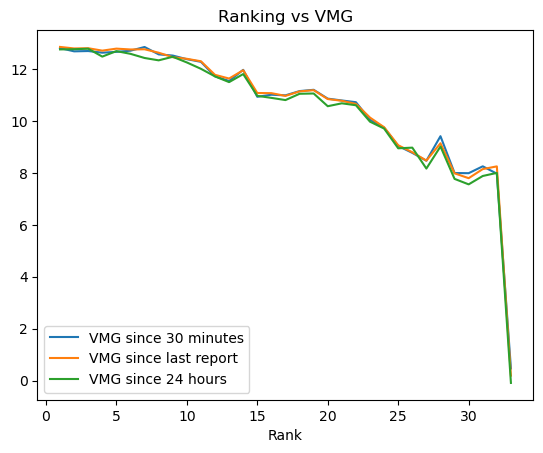

In [45]:
df_Rank_VMG.plot(title="Ranking vs VMG")

In [46]:
# df_Rank_VMG.plot().bar(figsize=(20,10))

<AxesSubplot:ylabel='Rank'>

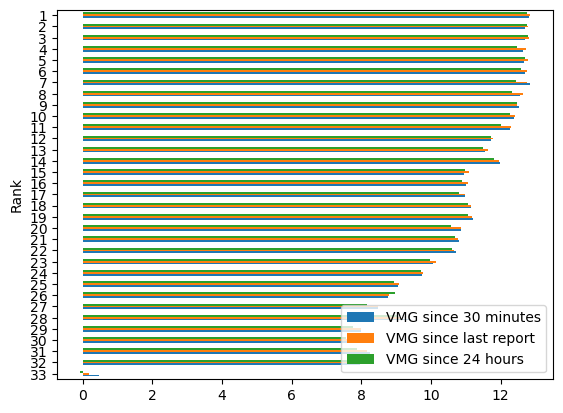

In [47]:
df_Rank_VMG.sort_values('Rank',ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='Rank'>

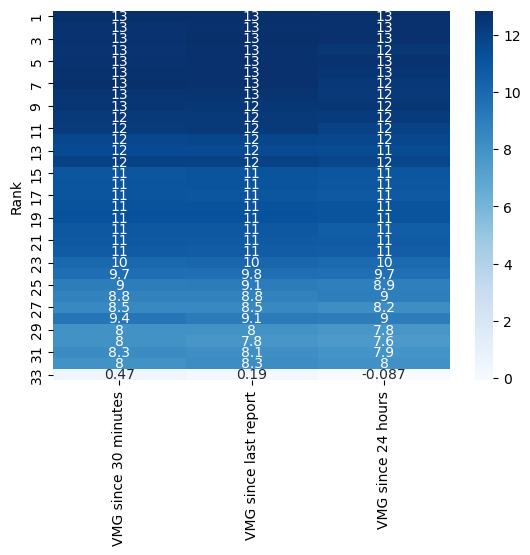

In [48]:
sns.heatmap(df_Rank_VMG,cmap='Blues', annot=True)

<AxesSubplot:ylabel='Rank'>

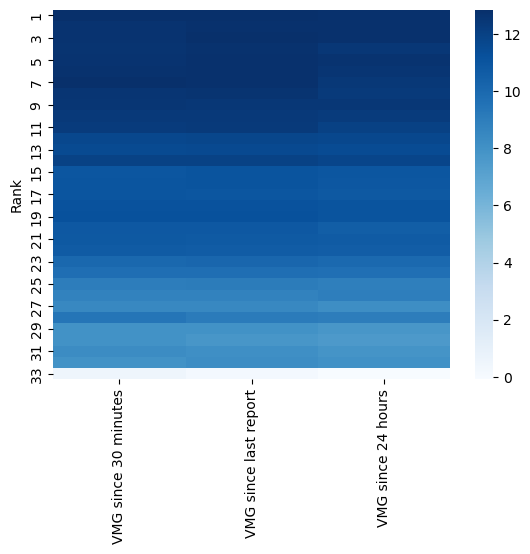

In [49]:
sns.heatmap(df_Rank_VMG,cmap='Blues')

In [50]:
df_Rank_VMG.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
           dtype='int64', name='Rank')

In [51]:
df_Rank_VMG.iloc[:,2]

Rank
1     12.755809
2     12.763354
3     12.783023
4     12.478306
5     12.690515
6     12.585597
7     12.425720
8     12.334836
9     12.471690
10    12.254032
11    12.008661
12    11.716061
13    11.496104
14    11.806285
15    10.968366
16    10.889317
17    10.804895
18    11.046946
19    11.058537
20    10.568322
21    10.680134
22    10.605747
23     9.972186
24     9.709104
25     8.947646
26     8.972902
27     8.167287
28     9.017000
29     7.769939
30     7.558861
31     7.881410
32     8.000735
33    -0.087234
Name: VMG since 24 hours, dtype: float64

[Text(0.5, 1.0, 'VMG since 30 minutes')]

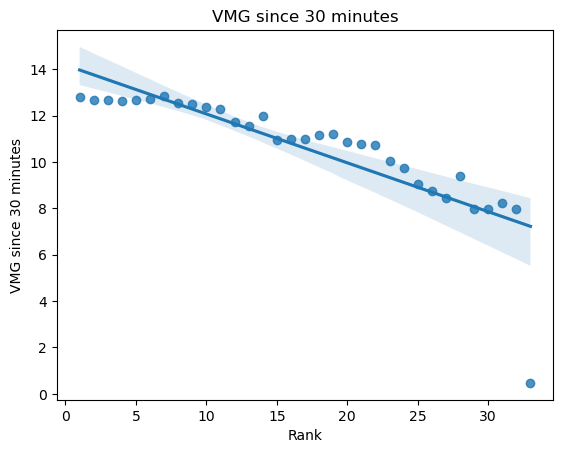

In [52]:
sns.regplot(x = df_Rank_VMG.index,y = df_Rank_VMG.iloc[:,0]).set(title =df_Rank_VMG.columns[0])

[Text(0.5, 1.0, 'VMG since last report')]

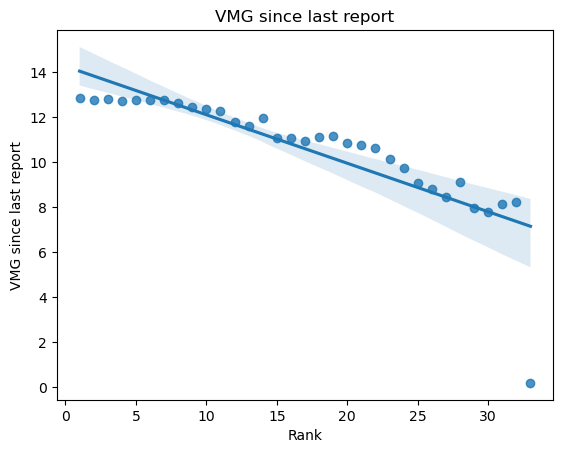

In [53]:
sns.regplot(x = df_Rank_VMG.index,y = df_Rank_VMG.iloc[:,1]).set(title =df_Rank_VMG.columns[1])

[Text(0.5, 1.0, 'VMG since 24 hours')]

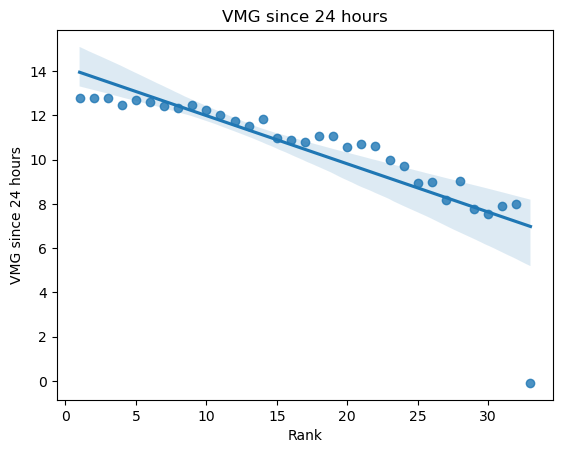

In [54]:
sns.regplot(x = df_Rank_VMG.index,y = df_Rank_VMG.iloc[:,2]).set(title =df_Rank_VMG.columns[2])

# Impact de la présence d'un foil sur le classement et la vitesse des voiliers.

In [55]:
df_combine.columns

Index(['Rank', 'Nat./Sail', 'Skipper/Crew', 'Hour FR', 'Lat', 'Lon',
       'Heading since 30 minutes', 'Speed since 30 minutes',
       'VMG since 30 minutes', 'Distance since 30 minutes',
       'Heading since last report', 'Speed since last report',
       'VMG since last report', 'Distance since last report',
       'Heading since 24 hours', 'Speed since 24 hours', 'VMG since 24 hours',
       'Distance since 24 hours', 'DTF', 'DTL', 'File Name', 'Skipper', 'Crew',
       'Numéro de voile ', 'Anciens noms du bateau ', 'Architecte ',
       'Chantier ', 'Date de lancement ', 'Longueur ', 'Largeur ',
       'Tirant d'eau ', 'Déplacement (poids) ', 'Nombre de dérives ',
       'Hauteur mât ', 'Voile quille ', 'Surface de voiles au près ',
       'Surface de voiles au portant '],
      dtype='object')

In [56]:
df_Rank_foil = df_combine[['Rank','VMG since last report','Nombre de dérives ']]
df_Rank_foil["Nombre de dérives "].value_counts()

 foils             6829
 2                 6683
 2 asymétriques     622
 foiler             158
Name: Nombre de dérives , dtype: int64

In [57]:
mapping = {" foils":"foil", " 2 asymétriques":"2"," 2":"2"," foiler":"foil"}
df_Rank_foil["Nombre de dérives "] = df_Rank_foil["Nombre de dérives "].map(mapping)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\3973875599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_Rank_foil["Nombre de dérives "].value_counts()

2       7305
foil    6987
Name: Nombre de dérives , dtype: int64

In [59]:
# try :
#     df_Rank_foil = df_Rank_foil.set_index("Rank")
# except:
#     pass

In [60]:
# df_Rank_foil = df_Rank_foil.reset_index()

In [61]:
df_Rank_foil.groupby(["Nombre de dérives "]).mean()

,Rank,VMG since last report
Nombre de dérives,,
2,18.501985,10.525585
foil,13.186919,11.666481


[Text(0.5, 1.0, 'Average VMG for Nombre de dérives')]

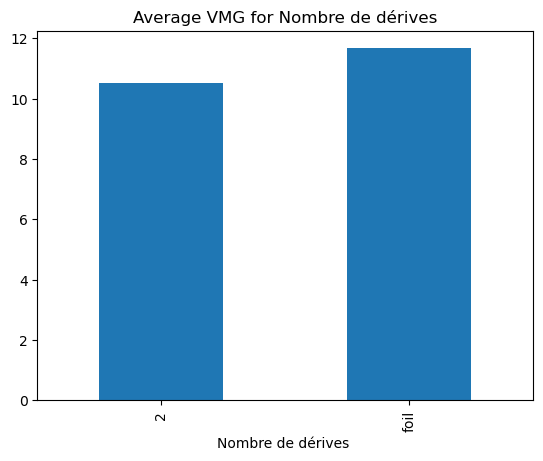

In [62]:
df_Rank_foil.groupby(["Nombre de dérives "])["VMG since last report"].mean().plot.bar().set(title ="Average VMG for Nombre de dérives")

[Text(0.5, 1.0, 'Ranking for Nombre de dérives')]

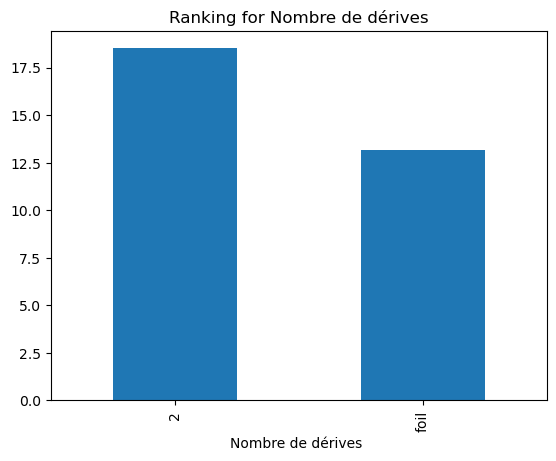

In [63]:
df_Rank_foil.groupby(["Nombre de dérives "])["Rank"].mean().plot.bar().set(title ="Ranking for Nombre de dérives")

In [64]:
df_Rank_foil.groupby(["Nombre de dérives "]).count()

,Rank,VMG since last report
Nombre de dérives,,
2,7305,7305
foil,6987,6987


In [65]:
df_Rank_foil.iloc[:,0:3]

,Rank,VMG since last report,Nombre de dérives
71,25,8.9,2
114,25,8.8,2
157,25,8.5,2
200,25,2.9,2
243,25,2.8,2
...,...,...,...
29332,27,0.0,2
29333,28,0.0,foil
29334,29,0.0,foil
29335,30,0.0,2


array([<AxesSubplot:ylabel='Rank'>,
       <AxesSubplot:ylabel='VMG since last report'>], dtype=object)

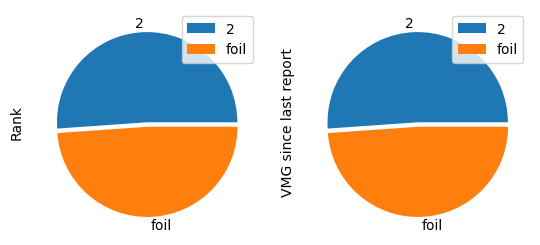

In [66]:
df_Rank_foil.groupby(["Nombre de dérives "]).count().plot.pie(subplots=True,explode=(0.0, 0.05))

# Conclusion :
Impact de la présence d'un foil sur le classement et la vitesse des voiliers : augmenter la vitesse des voiliers et donc effet positif sur le classement

# Visualisation de la distance parcourue par voilier.

In [67]:
df_combine.columns

Index(['Rank', 'Nat./Sail', 'Skipper/Crew', 'Hour FR', 'Lat', 'Lon',
       'Heading since 30 minutes', 'Speed since 30 minutes',
       'VMG since 30 minutes', 'Distance since 30 minutes',
       'Heading since last report', 'Speed since last report',
       'VMG since last report', 'Distance since last report',
       'Heading since 24 hours', 'Speed since 24 hours', 'VMG since 24 hours',
       'Distance since 24 hours', 'DTF', 'DTL', 'File Name', 'Skipper', 'Crew',
       'Numéro de voile ', 'Anciens noms du bateau ', 'Architecte ',
       'Chantier ', 'Date de lancement ', 'Longueur ', 'Largeur ',
       'Tirant d'eau ', 'Déplacement (poids) ', 'Nombre de dérives ',
       'Hauteur mât ', 'Voile quille ', 'Surface de voiles au près ',
       'Surface de voiles au portant '],
      dtype='object')

In [68]:
df_combine['Crew'].value_counts()

STARK                                     701
TSE - 4MYPLANET                           670
GROUPE SÉTIN                              622
CAMPAGNE DE FRANCE                        609
COMPAGNIE DU LIT - JILITI                 599
ONE PLANET ONE OCEAN                      584
MEDALLIA                                  574
TIME FOR OCEANS                           573
LA FABRIQUE                               572
DMG MORI GLOBAL ONE                       571
LA MIE CÂLINE - ARTISANS ARTIPÔLE         566
PURE - BEST WESTERN HOTELS AND RESORTS    541
CHARAL                                    539
BANQUE POPULAIRE X                        523
L'OCCITANE EN PROVENCE                    508
V AND B MAYENNE                           496
OMIA - WATER FAMILY                       491
YES WE CAM !                              488
GROUPE APICIL                             486
PRYSMIAN GROUP                            486
SEAEXPLORER - YACHT CLUB DE MONACO        485
LINKEDOUT                         

In [69]:
len(df_combine['Crew'].unique())

33

In [70]:
df_combine['Crew'].unique()[0]

'STARK'

In [71]:
df_combine[['Crew','Lat','Lon']][df_combine['Crew']=='STARK']

,Crew,Lat,Lon
71,STARK,46°42.81'N,02°25.92'W
114,STARK,47°08.44'N,03°48.90'W
157,STARK,47°10.93'N,04°42.36'W
200,STARK,47°12.82'N,05°20.69'W
243,STARK,47°09.11'N,05°35.11'W
...,...,...,...
29171,STARK,45°55.52'N,04°55.42'W
29212,STARK,45°57.83'N,03°46.51'W
29255,STARK,46°13.63'N,02°42.05'W
29296,STARK,46°18.09'N,02°13.60'W


In [72]:
df_distance_STARK = df_combine[['Lat','Lon']][df_combine['Crew']=='STARK']

In [73]:
df_distance_STARK_Lat_Deg = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[0])
df_distance_STARK_Lat_Min = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[1])
df_distance_STARK_Lat_Pole = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[2])

In [74]:
df_distance_STARK_Lon_Deg = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[0])
df_distance_STARK_Lon_Min = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[1])
df_distance_STARK_Lon_Pole = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[2])

In [75]:
df_distance_STARK_Lat_Deg = pd.to_numeric(df_distance_STARK_Lat_Deg)
df_distance_STARK_Lat_Min = pd.to_numeric(df_distance_STARK_Lat_Min)
df_distance_STARK_Lon_Deg = pd.to_numeric(df_distance_STARK_Lon_Deg)
df_distance_STARK_Lon_Min = pd.to_numeric(df_distance_STARK_Lon_Min)

In [76]:
def dms2dec(deg, mn, pole):
    if pole == "W" or pole == "S":
        return - (deg + mn / 60)
    if pole == "N" or pole == "E":
        return deg + mn / 60
dms2dec(48, 42,"E")

48.7

In [77]:
[dms2dec(df_distance_STARK_Lat_Deg.iloc[0],df_distance_STARK_Lat_Min.iloc[0],df_distance_STARK_Lat_Pole.iloc[0])]

[46.7135]

In [78]:
len(df_distance_STARK_Lat_Deg)

701

In [79]:
df_distance_STARK_Lat_Coor = pd.DataFrame(np.zeros(len(df_distance_STARK)))
for i in range(len(df_distance_STARK)):
    df_distance_STARK_Lat_Coor.iloc[i] = dms2dec(df_distance_STARK_Lat_Deg.iloc[i],df_distance_STARK_Lat_Min.iloc[i],df_distance_STARK_Lat_Pole.iloc[i])

df_distance_STARK_Lat_Coor.columns = ["STARK Lat Coor"]
df_distance_STARK_Lat_Coor

,STARK Lat Coor
0,46.713500
1,47.140667
2,47.182167
3,47.213667
4,47.151833
...,...
696,45.925333
697,45.963833
698,46.227167
699,46.301500


In [80]:
df_distance_STARK_Lon_Coor = pd.DataFrame(np.zeros(len(df_distance_STARK)))
for i in range(len(df_distance_STARK)):
    df_distance_STARK_Lon_Coor.iloc[i] = dms2dec(df_distance_STARK_Lon_Deg.iloc[i],df_distance_STARK_Lon_Min.iloc[i],df_distance_STARK_Lon_Pole.iloc[i])

df_distance_STARK_Lon_Coor.columns = ["STARK Lon Coor"]
df_distance_STARK_Lon_Coor

,STARK Lon Coor
0,-2.432000
1,-3.815000
2,-4.706000
3,-5.344833
4,-5.585167
...,...
696,-4.923667
697,-3.775167
698,-2.700833
699,-2.226667


In [81]:
df_distance_STARK_Lat_Lon = pd.concat([df_distance_STARK_Lat_Coor,df_distance_STARK_Lon_Coor.reindex(df_distance_STARK_Lat_Coor.index)],axis = 1)
df_distance_STARK_Lat_Lon

,STARK Lat Coor,STARK Lon Coor
0,46.713500,-2.432000
1,47.140667,-3.815000
2,47.182167,-4.706000
3,47.213667,-5.344833
4,47.151833,-5.585167
...,...,...
696,45.925333,-4.923667
697,45.963833,-3.775167
698,46.227167,-2.700833
699,46.301500,-2.226667


In [82]:
df_distance_STARK_tuple = df_distance_STARK_Lat_Lon.to_records(index=False)
df_distance_STARK_tuple

rec.array([( 46.7135    ,   -2.432     ), ( 47.14066667,   -3.815     ),
           ( 47.18216667,   -4.706     ), ( 47.21366667,   -5.34483333),
           ( 47.15183333,   -5.58516667), ( 46.81816667,   -5.8435    ),
           ( 46.38616667,   -6.315     ), ( 45.99133333,   -7.60316667),
           ( 45.79383333,   -8.35066667), ( 45.75866667,   -9.11816667),
           ( 45.721     ,   -9.856     ), ( 45.71016667,  -10.64083333),
           ( 45.5725    ,  -11.68133333), ( 45.43466667,  -13.467     ),
           ( 45.3675    ,  -14.44666667), ( 45.3515    ,  -15.05716667),
           ( 45.287     ,  -15.5105    ), ( 45.1415    ,  -15.88516667),
           ( 45.16066667,  -16.368     ), ( 45.1915    ,  -16.5905    ),
           ( 45.196     ,  -16.92133333), ( 45.005     ,  -17.34183333),
           ( 44.75033333,  -17.91883333), ( 44.5775    ,  -18.38716667),
           ( 44.43233333,  -18.897     ), ( 43.78033333,  -20.1465    ),
           ( 43.38316667,  -20.80783333), ( 43.0925

In [83]:
df_distance_STARK_tuple[0]

(46.7135, -2.432)

In [84]:
from geopy.distance import geodesic

In [85]:
geodesic(df_distance_STARK_tuple[0],df_distance_STARK_tuple[1])

Distance(115.5364314983847)

In [86]:
[geodesic(df_distance_STARK_tuple[i],df_distance_STARK_tuple[i+1]) for i in range(len(df_distance_STARK)-1)]

[Distance(115.5364314983847),
 Distance(67.7185122434767),
 Distance(48.53376976185137),
 Distance(19.47027465157116),
 Distance(41.978623028729245),
 Distance(60.093193316927845),
 Distance(108.69780298172235),
 Distance(62.029663439897284),
 Distance(59.819870277078145),
 Distance(57.57449132450862),
 Distance(61.11814057853305),
 Distance(82.54953397546223),
 Distance(140.39066985938214),
 Distance(77.06471176848675),
 Distance(47.866953924487724),
 Distance(36.2604219824171),
 Distance(33.58060601819546),
 Distance(38.02934197826535),
 Distance(17.82212305781964),
 Distance(26.001890302399154),
 Distance(39.318907636783166),
 Distance(53.66088674977492),
 Distance(41.813680364131244),
 Distance(43.63457441741963),
 Distance(123.51353298320026),
 Distance(69.2834720514291),
 Distance(52.30051455126767),
 Distance(62.69673390611747),
 Distance(65.62327186323442),
 Distance(84.16227820809479),
 Distance(172.2059551841803),
 Distance(84.87101998914568),
 Distance(51.28961977144297),
 D

In [87]:
[geodesic(df_distance_STARK_tuple[i],df_distance_STARK_tuple[i+1]) for i in range(len(df_distance_STARK)-1)]

[Distance(115.5364314983847),
 Distance(67.7185122434767),
 Distance(48.53376976185137),
 Distance(19.47027465157116),
 Distance(41.978623028729245),
 Distance(60.093193316927845),
 Distance(108.69780298172235),
 Distance(62.029663439897284),
 Distance(59.819870277078145),
 Distance(57.57449132450862),
 Distance(61.11814057853305),
 Distance(82.54953397546223),
 Distance(140.39066985938214),
 Distance(77.06471176848675),
 Distance(47.866953924487724),
 Distance(36.2604219824171),
 Distance(33.58060601819546),
 Distance(38.02934197826535),
 Distance(17.82212305781964),
 Distance(26.001890302399154),
 Distance(39.318907636783166),
 Distance(53.66088674977492),
 Distance(41.813680364131244),
 Distance(43.63457441741963),
 Distance(123.51353298320026),
 Distance(69.2834720514291),
 Distance(52.30051455126767),
 Distance(62.69673390611747),
 Distance(65.62327186323442),
 Distance(84.16227820809479),
 Distance(172.2059551841803),
 Distance(84.87101998914568),
 Distance(51.28961977144297),
 D

In [88]:
df_distance_STARK_geodesic = pd.DataFrame([geodesic(df_distance_STARK_tuple[i],df_distance_STARK_tuple[i+1]) for i in range(len(df_distance_STARK)-1)])
df_distance_STARK_geodesic.columns = ["Distance entre 2 points"]
df_distance_STARK_geodesic

,Distance entre 2 points
0,115.5364314983847 km
1,67.7185122434767 km
2,48.53376976185137 km
3,19.47027465157116 km
4,41.978623028729245 km
...,...
695,59.24590216491284 km
696,89.15735283073529 km
697,88.08273915884 km
698,37.4773256041524 km


In [89]:
df_distance_STARK_geodesic["Distance entre 2 points"][0]

Distance(115.5364314983847)

In [90]:
df_distance_STARK_Lat_Lon

,STARK Lat Coor,STARK Lon Coor
0,46.713500,-2.432000
1,47.140667,-3.815000
2,47.182167,-4.706000
3,47.213667,-5.344833
4,47.151833,-5.585167
...,...,...
696,45.925333,-4.923667
697,45.963833,-3.775167
698,46.227167,-2.700833
699,46.301500,-2.226667


In [91]:
from geopy import Point
from geopy.distance import distance
df_distance_STARK_Lat_Lon['pt'] = df_distance_STARK_Lat_Lon.apply(
    lambda row: Point(latitude=row['STARK Lat Coor'], longitude=row['STARK Lon Coor']), axis=1)
df_distance_STARK_Lat_Lon

,STARK Lat Coor,STARK Lon Coor,pt
0,46.713500,-2.432000,"46 42m 48.6s N, 2 25m 55.2s W"
1,47.140667,-3.815000,"47 8m 26.4s N, 3 48m 54s W"
2,47.182167,-4.706000,"47 10m 55.8s N, 4 42m 21.6s W"
3,47.213667,-5.344833,"47 12m 49.2s N, 5 20m 41.4s W"
4,47.151833,-5.585167,"47 9m 6.6s N, 5 35m 6.6s W"
...,...,...,...
696,45.925333,-4.923667,"45 55m 31.2s N, 4 55m 25.2s W"
697,45.963833,-3.775167,"45 57m 49.8s N, 3 46m 30.6s W"
698,46.227167,-2.700833,"46 13m 37.8s N, 2 42m 3s W"
699,46.301500,-2.226667,"46 18m 5.4s N, 2 13m 36s W"


In [92]:
df_distance_STARK_Lat_Lon['next pt'] = df_distance_STARK_Lat_Lon['pt'].shift(1)


In [93]:
df_distance_STARK_Lat_Lon['next pt'] 

0                                NaN
1      46 42m 48.6s N, 2 25m 55.2s W
2         47 8m 26.4s N, 3 48m 54s W
3      47 10m 55.8s N, 4 42m 21.6s W
4      47 12m 49.2s N, 5 20m 41.4s W
                   ...              
696        45 54m 12s N, 5 41m 12s W
697    45 55m 31.2s N, 4 55m 25.2s W
698    45 57m 49.8s N, 3 46m 30.6s W
699       46 13m 37.8s N, 2 42m 3s W
700       46 18m 5.4s N, 2 13m 36s W
Name: next pt, Length: 701, dtype: object

In [94]:
df_distance_STARK_Lat_Lon.loc[df_distance_STARK_Lat_Lon['next pt'].isna(), 'next pt'] = None


In [95]:
df_distance_STARK_Lat_Lon

,STARK Lat Coor,STARK Lon Coor,pt,next pt
0,46.713500,-2.432000,"46 42m 48.6s N, 2 25m 55.2s W",None
1,47.140667,-3.815000,"47 8m 26.4s N, 3 48m 54s W","46 42m 48.6s N, 2 25m 55.2s W"
2,47.182167,-4.706000,"47 10m 55.8s N, 4 42m 21.6s W","47 8m 26.4s N, 3 48m 54s W"
3,47.213667,-5.344833,"47 12m 49.2s N, 5 20m 41.4s W","47 10m 55.8s N, 4 42m 21.6s W"
4,47.151833,-5.585167,"47 9m 6.6s N, 5 35m 6.6s W","47 12m 49.2s N, 5 20m 41.4s W"
...,...,...,...,...
696,45.925333,-4.923667,"45 55m 31.2s N, 4 55m 25.2s W","45 54m 12s N, 5 41m 12s W"
697,45.963833,-3.775167,"45 57m 49.8s N, 3 46m 30.6s W","45 55m 31.2s N, 4 55m 25.2s W"
698,46.227167,-2.700833,"46 13m 37.8s N, 2 42m 3s W","45 57m 49.8s N, 3 46m 30.6s W"
699,46.301500,-2.226667,"46 18m 5.4s N, 2 13m 36s W","46 13m 37.8s N, 2 42m 3s W"


In [96]:
df_distance_STARK_Lat_Lon['Distance en km'] = df_distance_STARK_Lat_Lon.apply(lambda row: distance(row['pt'], row['next pt']).km if row['next pt'] is not None else float('nan'), axis=1)
df_distance_STARK_Lat_Lon = df_distance_STARK_Lat_Lon.drop('next pt', axis=1)

In [97]:
df_distance_STARK_Lat_Lon

,STARK Lat Coor,STARK Lon Coor,pt,Distance en km
0,46.713500,-2.432000,"46 42m 48.6s N, 2 25m 55.2s W",NaN
1,47.140667,-3.815000,"47 8m 26.4s N, 3 48m 54s W",115.536431
2,47.182167,-4.706000,"47 10m 55.8s N, 4 42m 21.6s W",67.718512
3,47.213667,-5.344833,"47 12m 49.2s N, 5 20m 41.4s W",48.533770
4,47.151833,-5.585167,"47 9m 6.6s N, 5 35m 6.6s W",19.470275
...,...,...,...,...
696,45.925333,-4.923667,"45 55m 31.2s N, 4 55m 25.2s W",59.245902
697,45.963833,-3.775167,"45 57m 49.8s N, 3 46m 30.6s W",89.157353
698,46.227167,-2.700833,"46 13m 37.8s N, 2 42m 3s W",88.082739
699,46.301500,-2.226667,"46 18m 5.4s N, 2 13m 36s W",37.477326


In [98]:
print("Distance totale parcourue du voilier {} = {} km".format(df_combine['Crew'].unique()[0],df_distance_STARK_Lat_Lon["Distance en km"].sum()))

Distance totale parcourue du voilier STARK = 52916.42561393436 km


In [99]:
distance_parcourue = pd.DataFrame(np.zeros([len(df_combine['Crew'].unique()),2]))
distance_parcourue.columns =["Voilier","Distance"]
distance_parcourue["Voilier"][0]

voiliers = []
distances = []

In [100]:
def distance_parcourue_voilier(voilier):

    df_distance_STARK = df_combine[['Lat','Lon']][df_combine['Crew']==voilier]
    df_distance_STARK_Lat_Deg = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[0])
    df_distance_STARK_Lat_Min = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[1])
    df_distance_STARK_Lat_Pole = df_distance_STARK["Lat"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[2])
    df_distance_STARK_Lon_Deg = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[0])
    df_distance_STARK_Lon_Min = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[1])
    df_distance_STARK_Lon_Pole = df_distance_STARK["Lon"].apply(lambda x : x.replace("°",",")).apply(lambda x : x.replace("'",",")).apply(lambda x : x.split(",")[2])
    df_distance_STARK_Lat_Deg = pd.to_numeric(df_distance_STARK_Lat_Deg)
    df_distance_STARK_Lat_Min = pd.to_numeric(df_distance_STARK_Lat_Min)
    df_distance_STARK_Lon_Deg = pd.to_numeric(df_distance_STARK_Lon_Deg)
    df_distance_STARK_Lon_Min = pd.to_numeric(df_distance_STARK_Lon_Min)

    df_distance_STARK_Lat_Coor = pd.DataFrame(np.zeros(len(df_distance_STARK)))
    for i in range(len(df_distance_STARK)):
        df_distance_STARK_Lat_Coor.iloc[i] = dms2dec(df_distance_STARK_Lat_Deg.iloc[i],df_distance_STARK_Lat_Min.iloc[i],df_distance_STARK_Lat_Pole.iloc[i])

    df_distance_STARK_Lat_Coor.columns = ["STARK Lat Coor"]

    df_distance_STARK_Lon_Coor = pd.DataFrame(np.zeros(len(df_distance_STARK)))
    for i in range(len(df_distance_STARK)):
        df_distance_STARK_Lon_Coor.iloc[i] = dms2dec(df_distance_STARK_Lon_Deg.iloc[i],df_distance_STARK_Lon_Min.iloc[i],df_distance_STARK_Lon_Pole.iloc[i])

    df_distance_STARK_Lon_Coor.columns = ["STARK Lon Coor"]

    df_distance_STARK_Lat_Lon = pd.concat([df_distance_STARK_Lat_Coor,df_distance_STARK_Lon_Coor.reindex(df_distance_STARK_Lat_Coor.index)],axis = 1)


    df_distance_STARK_Lat_Lon['pt'] = df_distance_STARK_Lat_Lon.apply(
        lambda row: Point(latitude=row['STARK Lat Coor'], longitude=row['STARK Lon Coor']), axis=1)

    df_distance_STARK_Lat_Lon['next pt'] = df_distance_STARK_Lat_Lon['pt'].shift(1)
    df_distance_STARK_Lat_Lon.loc[df_distance_STARK_Lat_Lon['next pt'].isna(), 'next pt'] = None

    df_distance_STARK_Lat_Lon['Distance en km'] = df_distance_STARK_Lat_Lon.apply(lambda row: distance(row['pt'], row['next pt']).km if row['next pt'] is not None else float('nan'), axis=1)
    df_distance_STARK_Lat_Lon = df_distance_STARK_Lat_Lon.drop('next pt', axis=1)

    print("Distance totale parcourue du voilier {} = {} km".format(voilier,df_distance_STARK_Lat_Lon["Distance en km"].sum()))

    voiliers.append(voilier)
    distances.append(df_distance_STARK_Lat_Lon["Distance en km"].sum())

In [101]:
for i in range(len(df_combine['Crew'].unique())):
    distance_parcourue_voilier(df_combine['Crew'].unique()[i])

Distance totale parcourue du voilier STARK = 52916.42561393436 km
Distance totale parcourue du voilier TSE - 4MYPLANET = 51037.86562473866 km
Distance totale parcourue du voilier GROUPE SÉTIN = 52457.82412758563 km
Distance totale parcourue du voilier CAMPAGNE DE FRANCE = 50398.550465890796 km
Distance totale parcourue du voilier COMPAGNIE DU LIT - JILITI = 50939.282647528526 km
Distance totale parcourue du voilier ONE PLANET ONE OCEAN = 51422.682549292585 km
Distance totale parcourue du voilier MEDALLIA = 50918.96216464564 km
Distance totale parcourue du voilier TIME FOR OCEANS = 52263.83067633399 km
Distance totale parcourue du voilier LA FABRIQUE = 52119.173847211816 km
Distance totale parcourue du voilier DMG MORI GLOBAL ONE = 52914.42654419396 km
Distance totale parcourue du voilier LA MIE CÂLINE - ARTISANS ARTIPÔLE = 51715.90489129553 km
Distance totale parcourue du voilier PURE - BEST WESTERN HOTELS AND RESORTS = 50004.25551575264 km
Distance totale parcourue du voilier CHARAL =

In [102]:
voiliers[:5]

['STARK',
 'TSE - 4MYPLANET',
 'GROUPE SÉTIN',
 'CAMPAGNE DE FRANCE',
 'COMPAGNIE DU LIT - JILITI']

In [103]:
distances[:5]

[52916.42561393436,
 51037.86562473866,
 52457.82412758563,
 50398.550465890796,
 50939.282647528526]

In [104]:
s = pd.DataFrame(voiliers,distances)
s = s.reset_index()
s.columns = ["Distance","Voilier"]
s = s.set_index("Voilier")

In [105]:
# pd.to_numeric(s.iloc[:,0])

<AxesSubplot:title={'center':'Visualisation de la distance parcourue par voilier'}, xlabel='Voilier', ylabel='Distance parcourue en km'>

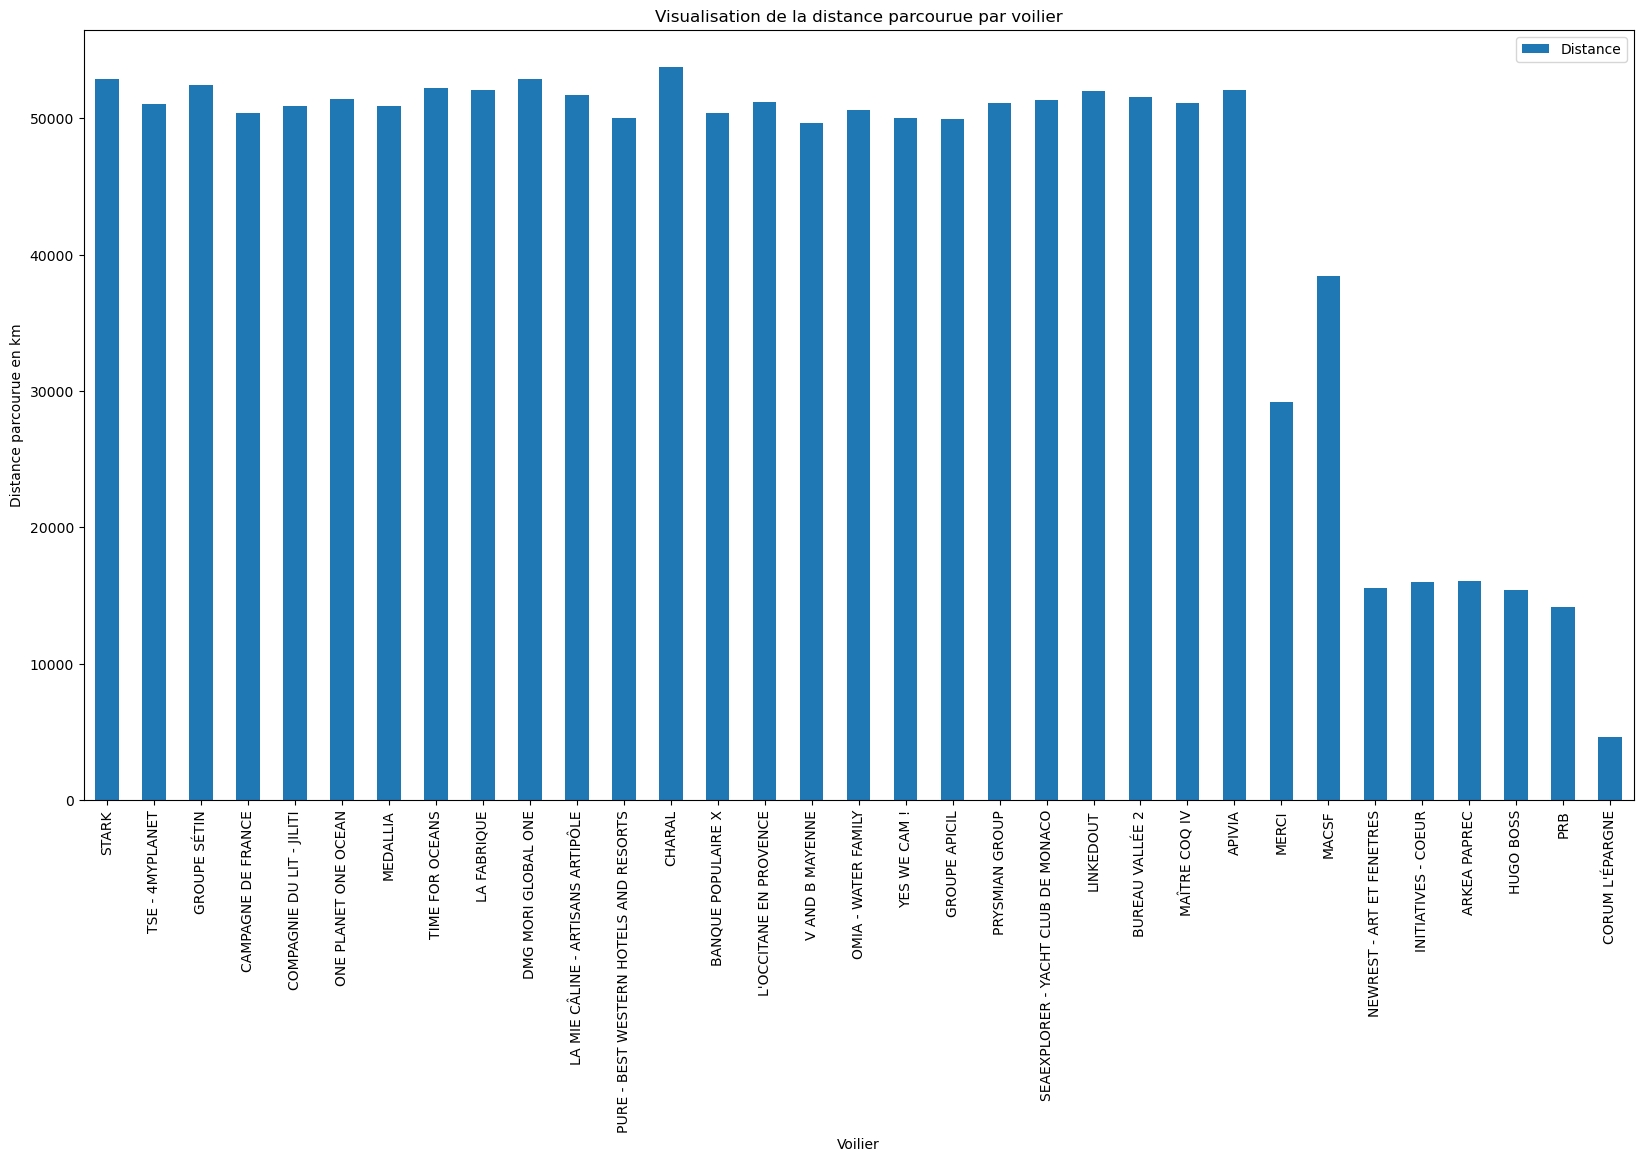

In [106]:
s.plot.bar(figsize = (20,10),ylabel="Distance parcourue en km",title ="Visualisation de la distance parcourue par voilier")

# Cartes avec les routes d'un ou plusieurs voiliers.

In [107]:
df_distance_STARK_Lat_Lon["STARK Lat Coor"]

0      46.713500
1      47.140667
2      47.182167
3      47.213667
4      47.151833
         ...    
696    45.925333
697    45.963833
698    46.227167
699    46.301500
700    46.427500
Name: STARK Lat Coor, Length: 701, dtype: float64

In [108]:
df_distance_STARK_Lat_Lon["STARK Lon Coor"]

0     -2.432000
1     -3.815000
2     -4.706000
3     -5.344833
4     -5.585167
         ...   
696   -4.923667
697   -3.775167
698   -2.700833
699   -2.226667
700   -1.803500
Name: STARK Lon Coor, Length: 701, dtype: float64

In [109]:
from ipyleaflet import Map
import plotly
import plotly.express as px

# map arround 48.71, 2.20
m = Map(center=(df_distance_STARK_Lat_Lon["STARK Lat Coor"][0], df_distance_STARK_Lat_Lon["STARK Lon Coor"][0]), zoom=12)
m

Map(center=[46.7135, -2.432], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [110]:
# !pip install geopandas

# Carte avec les routes du voilier STARK

In [111]:
from ipyleaflet import Marker, LayerGroup

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

layers = []
for i, row in df_distance_STARK_Lat_Lon.iterrows():
    marker = Marker(location=(row["STARK Lat Coor"], row["STARK Lon Coor"]),
                    draggable=False)
    layers.append(marker)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

m


Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

# Analyses de séries temporelles

In [140]:
df_combine.columns

Index(['Rank', 'Nat./Sail', 'Skipper/Crew', 'Hour FR', 'Lat', 'Lon',
       'Heading since 30 minutes', 'Speed since 30 minutes',
       'VMG since 30 minutes', 'Distance since 30 minutes',
       'Heading since last report', 'Speed since last report',
       'VMG since last report', 'Distance since last report',
       'Heading since 24 hours', 'Speed since 24 hours', 'VMG since 24 hours',
       'Distance since 24 hours', 'DTF', 'DTL', 'File Name', 'Skipper', 'Crew',
       'Numéro de voile ', 'Anciens noms du bateau ', 'Architecte ',
       'Chantier ', 'Date de lancement ', 'Longueur ', 'Largeur ',
       'Tirant d'eau ', 'Déplacement (poids) ', 'Nombre de dérives ',
       'Hauteur mât ', 'Voile quille ', 'Surface de voiles au près ',
       'Surface de voiles au portant '],
      dtype='object')

In [141]:
df_time = df_combine[["Rank","Crew","File Name"]]
df_time["File Name"].iloc[0]

'20210305_040000'

In [142]:
import datetime

In [143]:
def filename_to_datetime(filename):
    tmp = ""
    tmp = filename[0:4] + "-" + filename[4:6] + "-" + filename[6:8] + "-" + filename[9:11] + "-" + filename[11:13]
    var = datetime.datetime.strptime(tmp, "%Y-%m-%d-%H-%M")
    return var.strftime("%Y-%m-%d")

In [144]:
# strrr ="20210305_040000"
# filename_to_datetime(strrr)

In [145]:
# var = datetime.datetime.strptime(filename_to_datetime(strrr), "%Y-%m-%d-%H-%M")
# var.strftime("%H:%M %d/%m/%Y")

In [146]:
df_time["Datetime"] = df_time["File Name"].apply(lambda row : filename_to_datetime(row))

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\2056028371.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
df_time["Datetime"] = pd.to_datetime(df_time["Datetime"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\3343709162.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
df_time["Datetime"].dt.year

71       2021
114      2021
157      2021
200      2021
243      2021
         ... 
29332    2020
29333    2020
29334    2020
29335    2020
29336    2020
Name: Datetime, Length: 15272, dtype: int64

In [163]:
df_time = df_time.set_index("Datetime")

In [167]:
df_time = df_time.drop(columns=["File Name"])

In [202]:
df_time[df_time["Crew"]==df_combine['Crew'].unique()[0]]

,Rank,Crew
Datetime,,
2021-03-05,25,STARK
2021-03-04,25,STARK
2021-03-04,25,STARK
2021-03-04,25,STARK
2021-03-04,25,STARK
...,...,...
2020-11-09,30,STARK
2020-11-08,30,STARK
2020-11-08,32,STARK


c:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



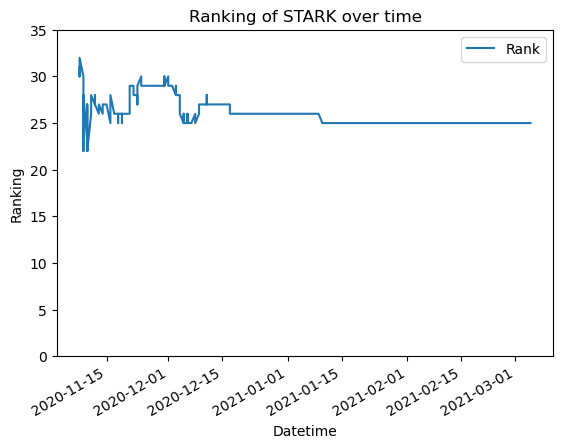

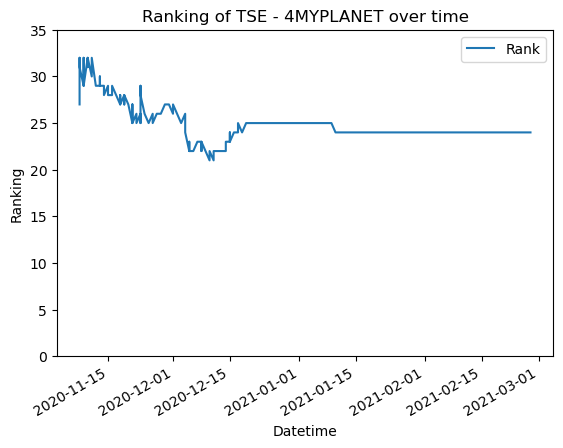

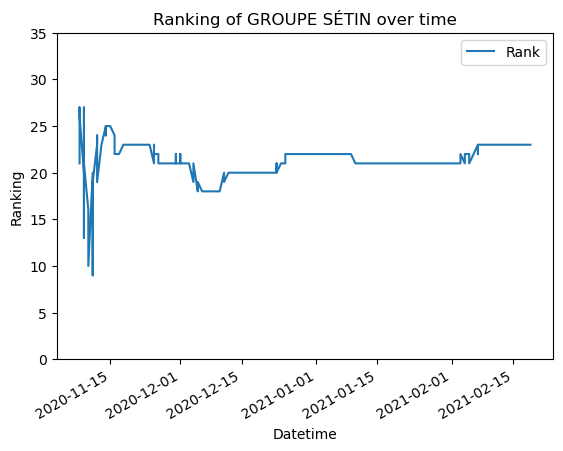

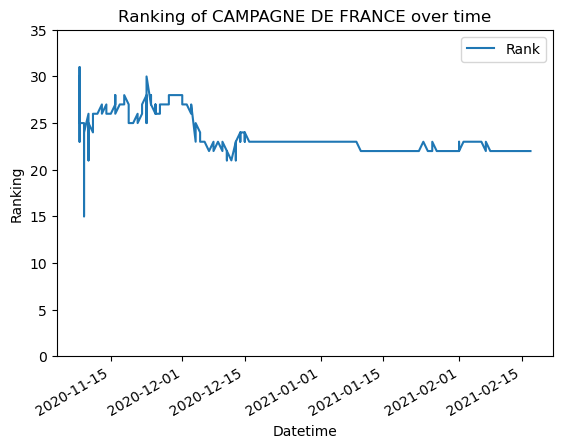

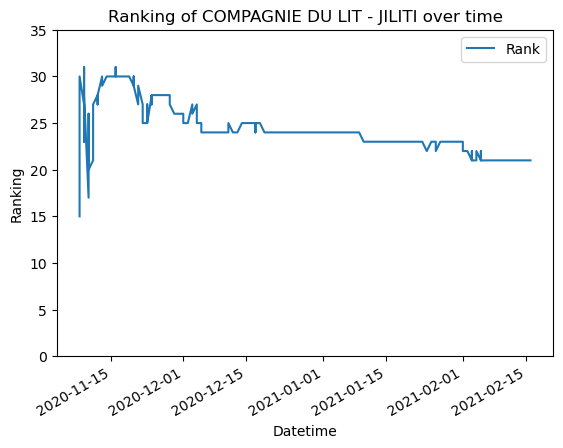

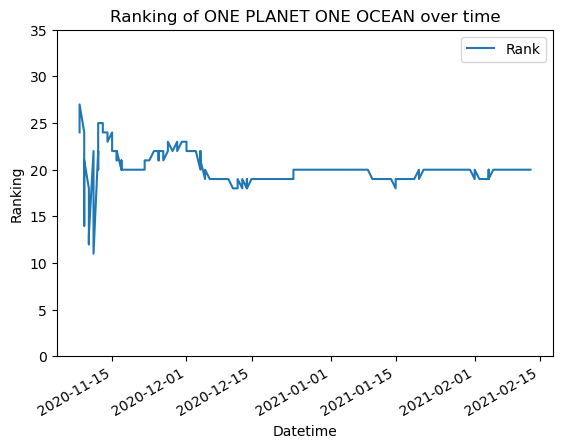

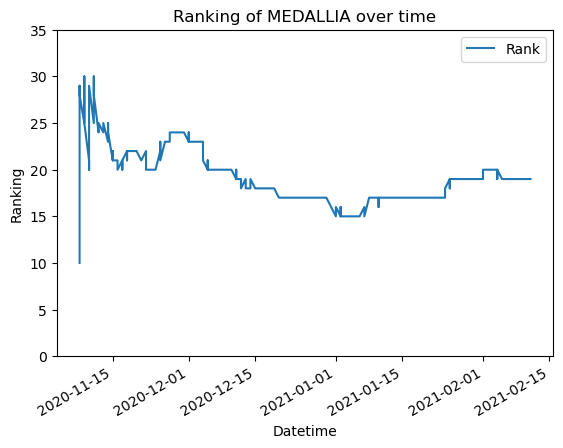

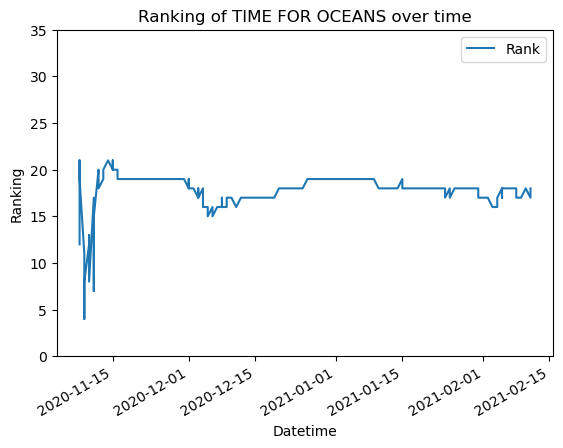

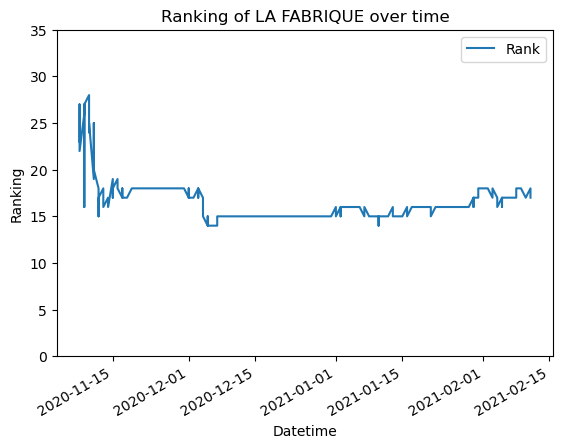

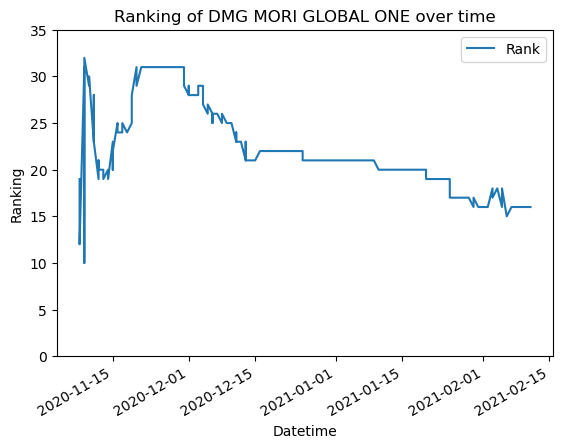

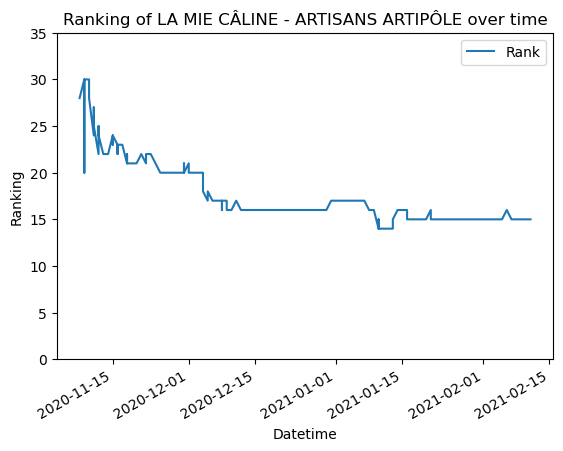

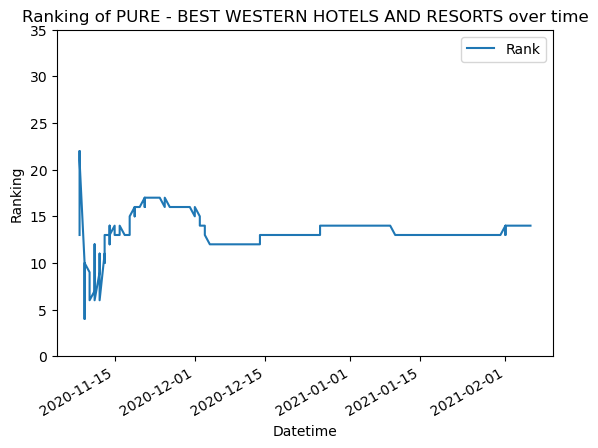

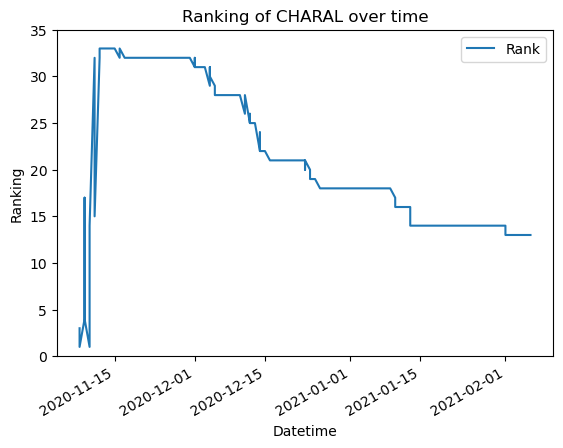

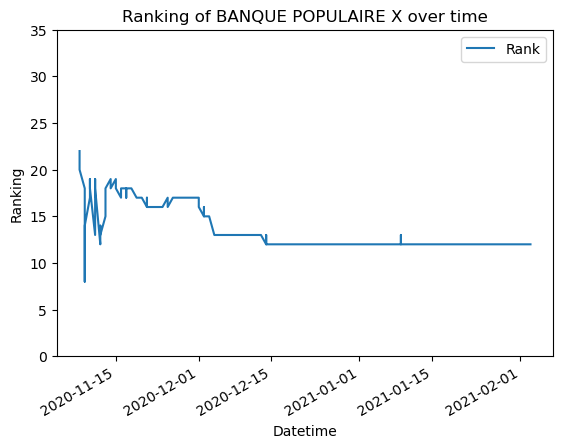

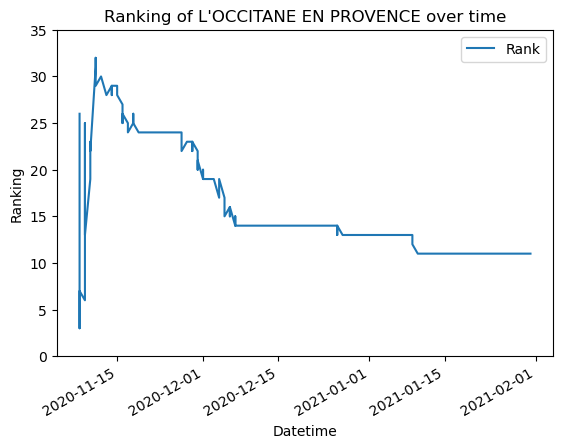

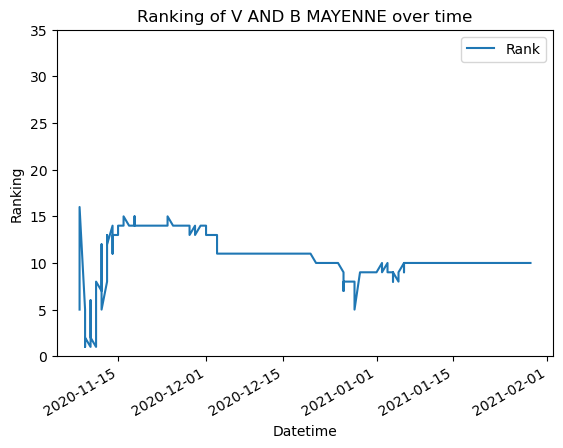

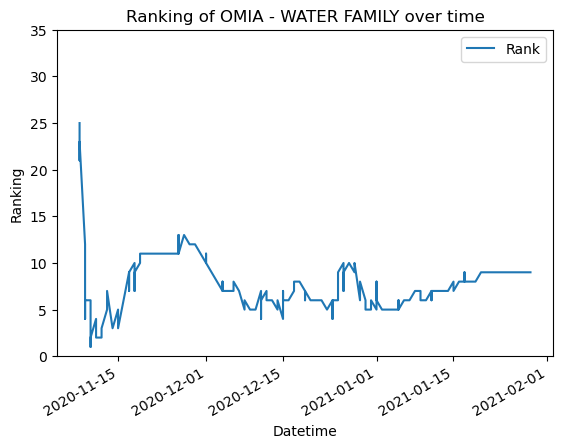

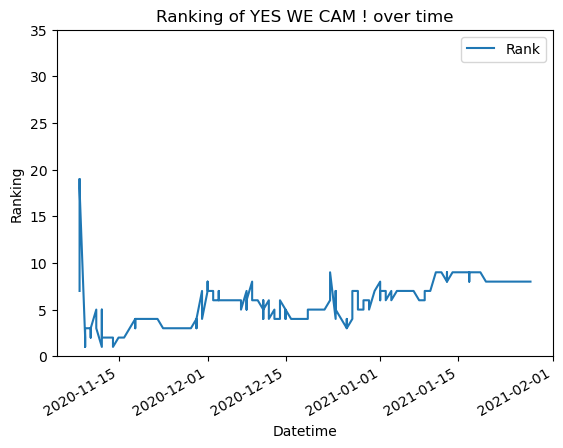

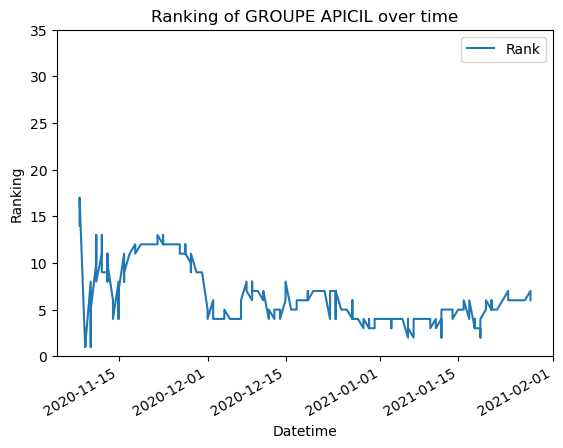

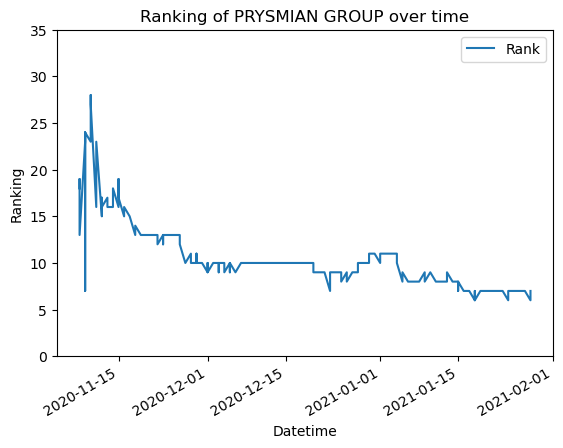

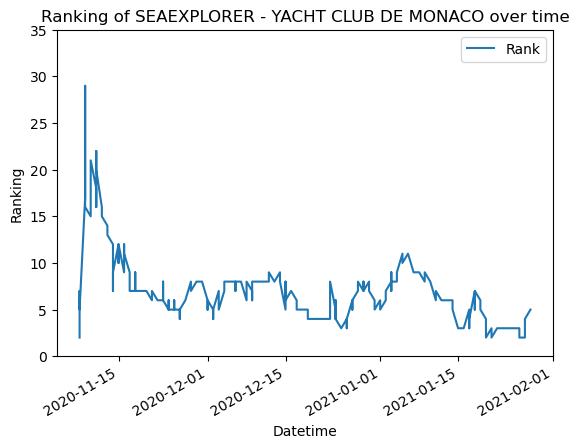

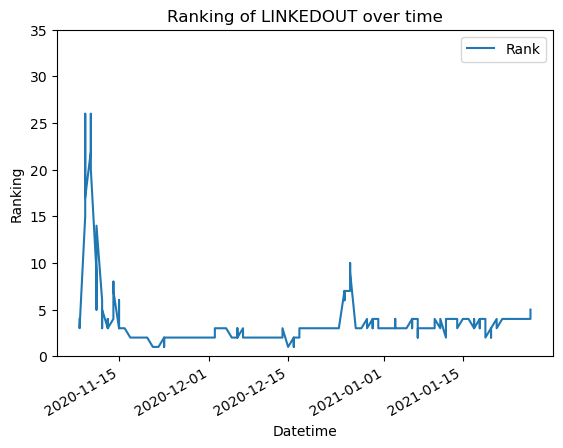

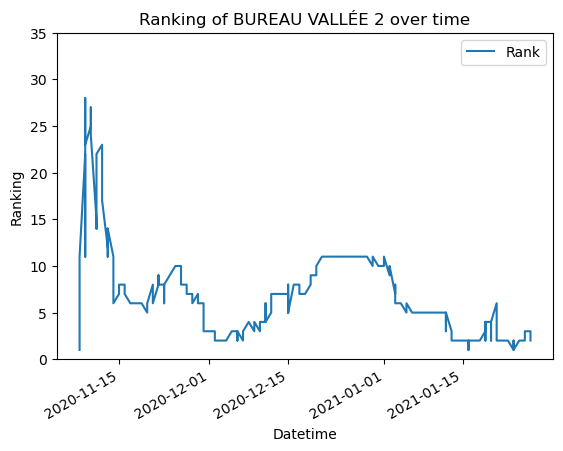

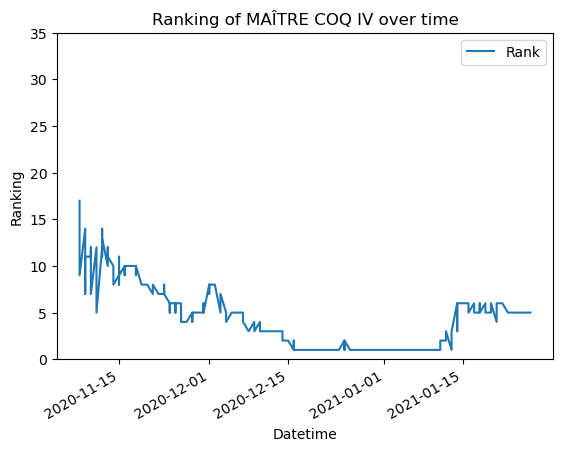

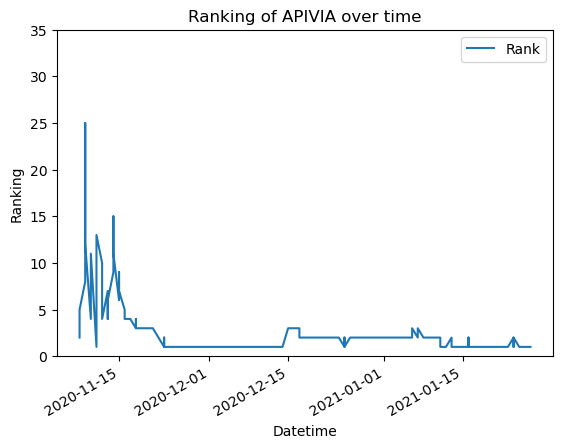

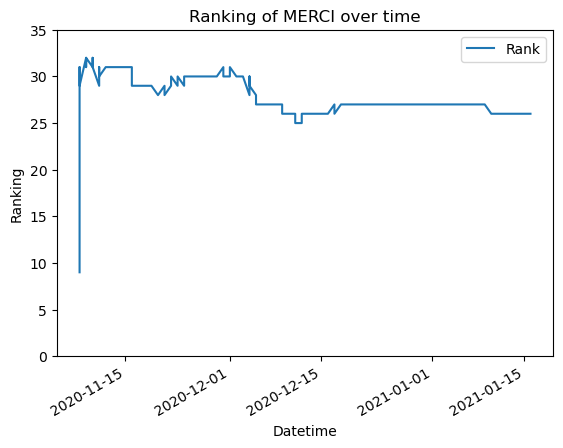

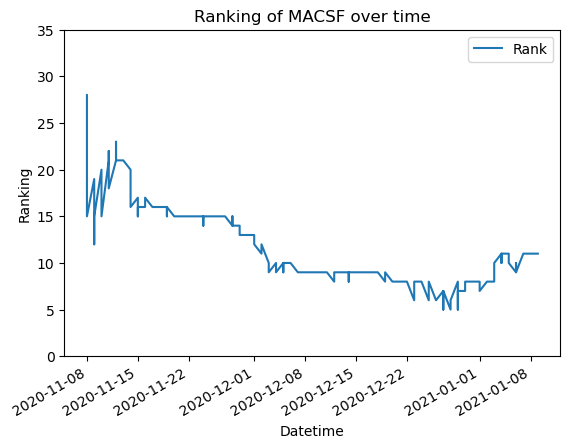

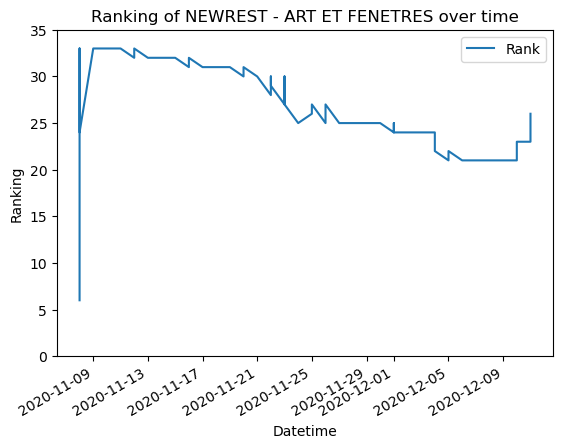

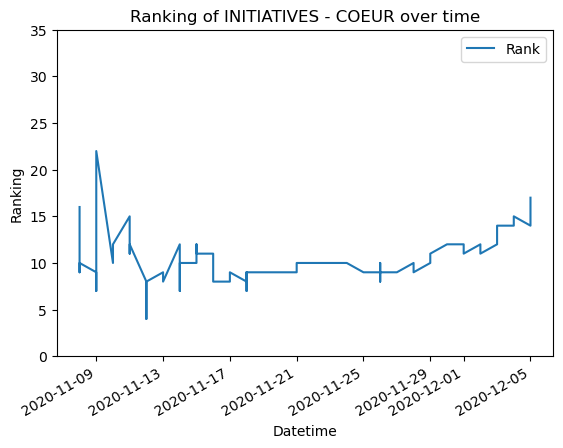

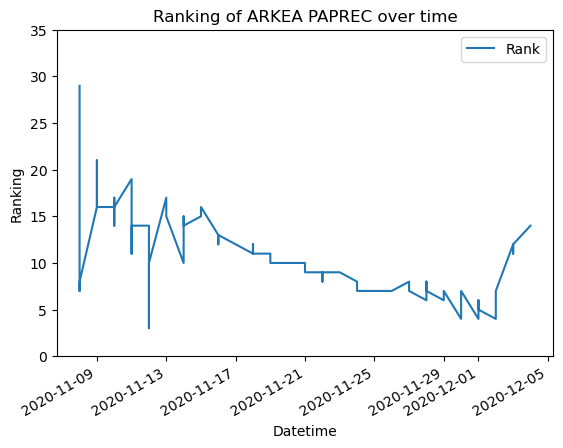

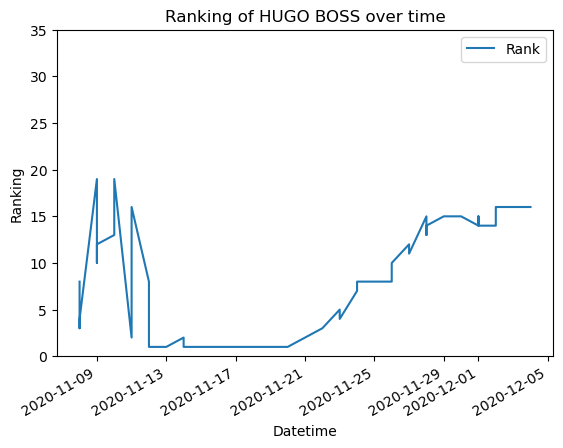

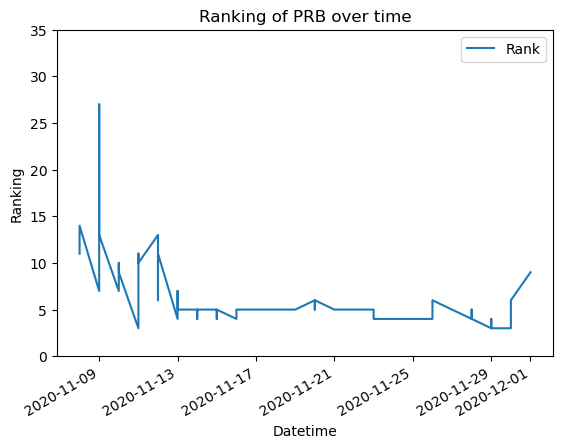

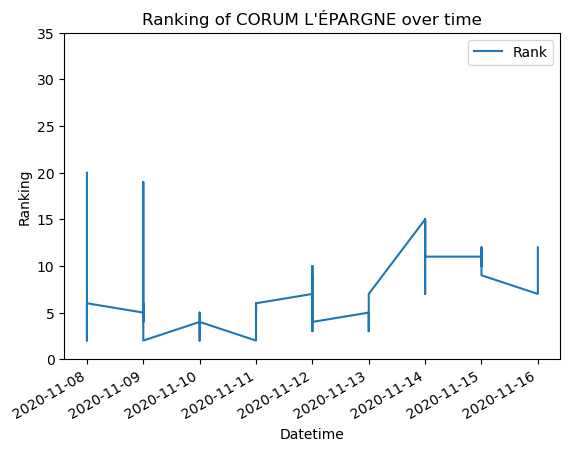

In [216]:
for i in range(len(df_combine['Crew'].unique())):
    title = "Ranking of {} over time".format(df_combine['Crew'].unique()[i])  
    df_time[df_time["Crew"]==df_combine['Crew'].unique()[i]].plot(title = title,ylabel="Ranking",ylim=[0,35])

# Application d'algorithmes statistiques ou de machine learning.

In [217]:
df_combine.columns

Index(['Rank', 'Nat./Sail', 'Skipper/Crew', 'Hour FR', 'Lat', 'Lon',
       'Heading since 30 minutes', 'Speed since 30 minutes',
       'VMG since 30 minutes', 'Distance since 30 minutes',
       'Heading since last report', 'Speed since last report',
       'VMG since last report', 'Distance since last report',
       'Heading since 24 hours', 'Speed since 24 hours', 'VMG since 24 hours',
       'Distance since 24 hours', 'DTF', 'DTL', 'File Name', 'Skipper', 'Crew',
       'Numéro de voile ', 'Anciens noms du bateau ', 'Architecte ',
       'Chantier ', 'Date de lancement ', 'Longueur ', 'Largeur ',
       'Tirant d'eau ', 'Déplacement (poids) ', 'Nombre de dérives ',
       'Hauteur mât ', 'Voile quille ', 'Surface de voiles au près ',
       'Surface de voiles au portant '],
      dtype='object')

In [218]:
from sklearn.model_selection import train_test_split

In [256]:
df_ML = df_combine[["Rank", "Largeur ", "Déplacement (poids) ", "Nombre de dérives ",
       "Hauteur mât ", "Voile quille ", "Surface de voiles au près ",
       "Surface de voiles au portant "]]
df_ML

,Rank,Largeur,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
71,25,"5,80 m","8,5 t",2,28 m,acier,270 m2,580 m2
114,25,"5,80 m","8,5 t",2,28 m,acier,270 m2,580 m2
157,25,"5,80 m","8,5 t",2,28 m,acier,270 m2,580 m2
200,25,"5,80 m","8,5 t",2,28 m,acier,270 m2,580 m2
243,25,"5,80 m","8,5 t",2,28 m,acier,270 m2,580 m2
...,...,...,...,...,...,...,...,...
29332,27,"5,54m",9t,2,29 m,acier,260 m2,580 m2
29333,28,"5,60 m","7,7 t",foils,27 m,acier,300 m2,650 m2
29334,29,"5,70 m",8 t,foiler,29 m,Inox usiné,260 m2,600 m2
29335,30,"5,50 m","8,5 t",2,28 m,carbone,330 m2,600 m2


In [275]:
df_ML["Largeur "].replace(" 5,80m"," 5,80 m").replace(" 5,54m"," 5,54 m").value_counts().sort_index(ascending=False)

 5,90 m    1060
 5,85 m    2768
 5,84 m     573
 5,80 m    3316
 5,75 m     599
 5,70 m    1953
 5,65 m     566
 5,60 m     793
 5,54 m     670
 5,50 m    1254
 5,40 m     156
 5,30 m     584
Name: Largeur , dtype: int64

In [276]:
df_ML["Largeur "] = df_ML["Largeur "].replace(" 5,80m"," 5,80 m").replace(" 5,54m"," 5,54 m")

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\2310237439.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [278]:
df_ML["Déplacement (poids) "].values

array([' 8,5 t', ' 8,5 t', ' 8,5 t', ..., ' 8 t', ' 8,5 t', ' 8,5 t'],
      dtype=object)

In [297]:
df_ML["Déplacement (poids) "] = df_ML["Déplacement (poids) "].replace(" nc"," NC").replace(" 9t"," 9 t").replace(" 8t"," 8 t").replace(" 7,9 tonnes", " 7,9").replace(" 7,9 t", " 7,9").replace(" NC"," 8 t")

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\131734941.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
df_ML["Déplacement (poids) "].replace(" nc"," NC").replace(" 9t"," 9 t").replace(" 8t"," 8 t").replace(" 7,9 tonnes", " 7,9").replace(" 7,9 t", " 7,9").replace(" NC"," 8 t").value_counts().sort_index(ascending=False)

 9 t      2407
 8,9 t     584
 8,5 t    3385
 8 t      4406
 7,9       616
 7,8 t     671
 7,7 t    1055
 7,6 t     968
 7 t       200
Name: Déplacement (poids) , dtype: int64